In [1]:
pip install awkward

In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import uproot3
import awkward as ak
import sklearn
from sklearn.utils import shuffle
from matplotlib.lines import Line2D
import math

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.optimizers import SGD

from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from itertools import chain
import tensorflow as tf
from keras import optimizers, initializers

from sklearn.utils import shuffle

import itertools
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split

In [5]:
#background
data_1 = uproot3.open ("4tall.root")
#signals
data_2 = uproot3.open ("tttt400.root")
data_3 = uproot3.open ("tttt500.root")
data_4 = uproot3.open ("tttt600.root")




In [6]:
data_1 = data_1['tree'].arrays()
data_1 = pd.DataFrame(data_1)

data_2 = data_2['tree'].arrays()
data_2 = pd.DataFrame(data_2)

data_3 = data_3['tree'].arrays()
data_3 = pd.DataFrame(data_3)

data_4 = data_4['tree'].arrays()
data_4 = pd.DataFrame(data_4)


In [7]:
#Count elements of the 2d list and return a list of number of elements
def num_var(A):
    newlist = []
    for i in A:
        if type(i) in [list,str,np.ndarray]:
            newlist.append(len(i))
        else:
            newlist.append(len([i]))
    return newlist

In [8]:
def Bjet_var(iterA, iterB):
    def multiply(a, b):
        try:
            iter(a)
        except TypeError:
            # You have a number
            return a * b
        return Bjet_var(a, b)
    return [multiply(*pair) for pair in zip(iterA, iterB)]

In [9]:
def Max_lep(AS):
    ml = []
    for i in range(AS.shape[0]):
        if(len(AS[b'ele_pt'][i]) !=0 and len(AS[b'muon_pt'][i]) != 0):
            x = max(AS[b'ele_pt'][i])
            y = max(AS[b'muon_pt'][i])
            z = max(x,y)
        elif (len(AS[b'ele_pt'][i]) !=0 and len(AS[b'muon_pt'][i]) == 0):
            z = max(AS[b'ele_pt'][i])
        elif (len(AS[b'ele_pt'][i]) ==0 and len(AS[b'muon_pt'][i]) != 0):
            z = max(AS[b'muon_pt'][i])
        elif (len(AS[b'ele_pt'][i]) ==0 and len(AS[b'muon_pt'][i]) == 0):
            z = 0
        ml.append(z)
    return ml

In [10]:
ml1 = []
for i in range(data_1.shape[0]):
    if(len(data_1[b'ele_pt'][i]) !=0 and len(data_1[b'muon_pt'][i]) != 0):
        x1 = max(data_1[b'ele_pt'][i])
        y1 = max(data_1[b'muon_pt'][i])
        z1 = max(x1,y1)
    elif (len(data_1[b'ele_pt'][i]) !=0 and len(data_1[b'muon_pt'][i]) == 0):
        z1 = max(data_1[b'ele_pt'][i])
    elif (len(data_1[b'ele_pt'][i]) ==0 and len(data_1[b'muon_pt'][i]) != 0):
        z1 = max(data_1[b'muon_pt'][i])
    elif (len(data_1[b'ele_pt'][i]) ==0 and len(data_1[b'muon_pt'][i]) == 0):
        z1 = 0
    ml1.append(z1)

In [11]:
ml2 = []
for i in range(data_2.shape[0]):
    if(len(data_2[b'ele_pt'][i]) !=0 and len(data_2[b'muon_pt'][i]) != 0):
        x2 = max(data_2[b'ele_pt'][i])
        y2 = max(data_2[b'muon_pt'][i])
        z2 = max(x2,y2)
    elif (len(data_2[b'ele_pt'][i]) !=0 and len(data_2[b'muon_pt'][i]) == 0):
        z2 = max(data_2[b'ele_pt'][i])
    elif (len(data_2[b'ele_pt'][i]) ==0 and len(data_2[b'muon_pt'][i]) != 0):
        z2 = max(data_2[b'muon_pt'][i])
    elif (len(data_2[b'ele_pt'][i]) ==0 and len(data_2[b'muon_pt'][i]) == 0):
        z2 = 0
    ml2.append(z2)

In [12]:
ml3 = []
for i in range(data_3.shape[0]):
    if(len(data_3[b'ele_pt'][i]) !=0 and len(data_3[b'muon_pt'][i]) != 0):
        x3 = max(data_3[b'ele_pt'][i])
        y3 = max(data_3[b'muon_pt'][i])
        z3 = max(x3,y3)
    elif (len(data_3[b'ele_pt'][i]) !=0 and len(data_3[b'muon_pt'][i]) == 0):
        z3 = max(data_3[b'ele_pt'][i])
    elif (len(data_3[b'ele_pt'][i]) ==0 and len(data_3[b'muon_pt'][i]) != 0):
        z3 = max(data_3[b'muon_pt'][i])
    elif (len(data_3[b'ele_pt'][i]) ==0 and len(data_3[b'muon_pt'][i]) == 0):
        z3 = 0
    ml3.append(z3)

In [13]:
ml4 = []
for i in range(data_4.shape[0]):
    if(len(data_4[b'ele_pt'][i]) !=0 and len(data_4[b'muon_pt'][i]) != 0):
        x4 = max(data_4[b'ele_pt'][i])
        y4 = max(data_4[b'muon_pt'][i])
        z4 = max(x4,y4)
    elif (len(data_4[b'ele_pt'][i]) !=0 and len(data_4[b'muon_pt'][i]) == 0):
        z4 = max(data_4[b'ele_pt'][i])
    elif (len(data_4[b'ele_pt'][i]) ==0 and len(data_4[b'muon_pt'][i]) != 0):
        z4 = max(data_4[b'muon_pt'][i])
    elif (len(data_4[b'ele_pt'][i]) ==0 and len(data_4[b'muon_pt'][i]) == 0):
        z4 = 0
    ml4.append(z4)

In [14]:
data_1["Bjet_pt"] = Bjet_var(data_1[b'jet_detector_b'],data_1[b'jet_pt'])
data_1["Bjet_eta"] = Bjet_var(data_1[b'jet_detector_b'],data_1[b'jet_eta'])
data_1["Bjet_phi"] = Bjet_var(data_1[b'jet_detector_b'],data_1[b'jet_phi'])
data_1["Bjet_e"] = Bjet_var(data_1[b'jet_detector_b'],data_1[b'jet_e'])

In [15]:
data_2["Bjet_pt"] = Bjet_var(data_2[b'jet_detector_b'],data_2[b'jet_pt'])
data_2["Bjet_eta"] = Bjet_var(data_2[b'jet_detector_b'],data_2[b'jet_eta'])
data_2["Bjet_phi"] = Bjet_var(data_2[b'jet_detector_b'],data_2[b'jet_phi'])
data_2["Bjet_e"] = Bjet_var(data_2[b'jet_detector_b'],data_2[b'jet_e'])

In [16]:
data_3["Bjet_pt"] = Bjet_var(data_3[b'jet_detector_b'],data_3[b'jet_pt'])
data_3["Bjet_eta"] = Bjet_var(data_3[b'jet_detector_b'],data_3[b'jet_eta'])
data_3["Bjet_phi"] = Bjet_var(data_3[b'jet_detector_b'],data_3[b'jet_phi'])
data_3["Bjet_e"] = Bjet_var(data_3[b'jet_detector_b'],data_3[b'jet_e'])

In [17]:
data_4["Bjet_pt"] = Bjet_var(data_4[b'jet_detector_b'],data_4[b'jet_pt'])
data_4["Bjet_eta"] = Bjet_var(data_4[b'jet_detector_b'],data_4[b'jet_eta'])
data_4["Bjet_phi"] = Bjet_var(data_4[b'jet_detector_b'],data_4[b'jet_phi'])
data_4["Bjet_e"] = Bjet_var(data_4[b'jet_detector_b'],data_4[b'jet_e'])

In [18]:
list_1 = data_1[b'jet_detector_b'].values
list_2 = data_2[b'jet_detector_b'].values
list_3 = data_3[b'jet_detector_b'].values
list_4 = data_4[b'jet_detector_b'].values

In [19]:
data_1['Bjet_pt'] = list_1*data_1[b'jet_pt']
data_1['Bjet_eta'] = list_1*data_1[b'jet_eta']
data_1['Bjet_phi'] = list_1*data_1[b'jet_phi']
data_1['Bjet_e'] = list_1*data_1[b'jet_e']

In [20]:
data_2['Bjet_pt'] = list_2*data_2[b'jet_pt']
data_2['Bjet_eta'] = list_2*data_2[b'jet_eta']
data_2['Bjet_phi'] = list_2*data_2[b'jet_phi']
data_2['Bjet_e'] = list_2*data_2[b'jet_e']

In [21]:
data_3['Bjet_pt'] = list_3*data_3[b'jet_pt']
data_3['Bjet_eta'] = list_3*data_3[b'jet_eta']
data_3['Bjet_phi'] = list_3*data_3[b'jet_phi']
data_3['Bjet_e'] = list_3*data_3[b'jet_e']

In [22]:
data_4['Bjet_pt'] = list_4*data_4[b'jet_pt']
data_4['Bjet_eta'] = list_4*data_4[b'jet_eta']
data_4['Bjet_phi'] = list_4*data_4[b'jet_phi']
data_4['Bjet_e'] = list_4*data_4[b'jet_e']

In [23]:
data_1["max_l"] = ml1
data_2["max_l"] = ml2
data_3["max_l"] = ml3
data_4["max_l"] = ml4

In [24]:
data_1 = data_1[['Bjet_pt','Bjet_eta','Bjet_phi','Bjet_e', b'jet_pt',                  
            b'jet_eta',
            b'jet_phi',                      b'jet_e',
            b'jet_detector_b',            
            b'ele_pt',                    b'ele_eta',
            b'ele_phi',                      b'ele_e',
            b'muon_pt',                   b'muon_eta',
            b'muon_phi',                     b'muon_e',
            b'ele_c',                     b'muon_c',
            b'met_et',                      b'met_phi',
            b'nmuon',                       b'nele', 'max_l']]

In [25]:
data_2 = data_2[['Bjet_pt','Bjet_eta','Bjet_phi','Bjet_e', b'jet_pt',                  
            b'jet_eta',
            b'jet_phi',                      b'jet_e',
            b'jet_detector_b',            
            b'ele_pt',                    b'ele_eta',
            b'ele_phi',                      b'ele_e',
            b'muon_pt',                   b'muon_eta',
            b'muon_phi',                     b'muon_e',
            b'ele_c',                     b'muon_c',
            b'met_et',                      b'met_phi',
            b'nmuon',                       b'nele', 'max_l']]

In [26]:
data_3 = data_3[['Bjet_pt','Bjet_eta','Bjet_phi','Bjet_e', b'jet_pt',                  
            b'jet_eta',
            b'jet_phi',                      b'jet_e',
            b'jet_detector_b',            
            b'ele_pt',                    b'ele_eta',
            b'ele_phi',                      b'ele_e',
            b'muon_pt',                   b'muon_eta',
            b'muon_phi',                     b'muon_e',
            b'ele_c',                     b'muon_c',
            b'met_et',                      b'met_phi',
            b'nmuon',                       b'nele', 'max_l']]

In [27]:
data_4 = data_4[['Bjet_pt','Bjet_eta','Bjet_phi','Bjet_e', b'jet_pt',                  
            b'jet_eta',
            b'jet_phi',                      b'jet_e',
            b'jet_detector_b',            
            b'ele_pt',                    b'ele_eta',
            b'ele_phi',                      b'ele_e',
            b'muon_pt',                   b'muon_eta',
            b'muon_phi',                     b'muon_e',
            b'ele_c',                     b'muon_c',
            b'met_et',                      b'met_phi',
            b'nmuon',                       b'nele', 'max_l']]

In [28]:
def pt_25(List):
    greaterThan = []
    lessThan = []
    for j in range(len(List)):
        if(List[j] >=25):
            greaterThan.append(List[j])
        else:
            lessThan.append(List[j])
    if len(greaterThan) == len(List):
        
        return List
    else:
        pass

In [29]:
ListOfLists = []
for i in range(data_1.shape[0]):
    if(len(data_1[b'ele_pt'][i]) !=0 and len(data_1[b'muon_pt'][i]) != 0):
        if (pt_25(data_1[b'ele_pt'][i]) is not None) and (pt_25(data_1[b'muon_pt'][i]) is not None):
            ListOfLists.append(data_1.iloc[i].tolist())

In [30]:
Listoflists2 = []
for i in range(data_2.shape[0]):
    if(len(data_2[b'ele_pt'][i]) !=0 and len(data_2[b'muon_pt'][i]) !=0):
        if (pt_25(data_2[b'ele_pt'][i]) is not None) and (pt_25(data_2[b'muon_pt'][i]) is not None):
            Listoflists2.append(data_2.iloc[i].tolist())

In [31]:
Listoflists3 = []
for i in range(data_3.shape[0]):
    if(len(data_3[b'ele_pt'][i]) !=0 and len(data_3[b'muon_pt'][i]) !=0):
        if (pt_25(data_3[b'ele_pt'][i]) is not None) and (pt_25(data_3[b'muon_pt'][i]) is not None):
            Listoflists3.append(data_3.iloc[i].tolist())

In [32]:
Listoflists4 = []
for i in range(data_4.shape[0]):
    if(len(data_4[b'ele_pt'][i]) !=0 and len(data_4[b'muon_pt'][i]) !=0):
        if (pt_25(data_4[b'ele_pt'][i]) is not None) and (pt_25(data_4[b'muon_pt'][i]) is not None):
            Listoflists4.append(data_4.iloc[i].tolist())

In [33]:
data_1 = pd.DataFrame(ListOfLists, columns = data_1.columns)

data_2 = pd.DataFrame(Listoflists2, columns = data_2.columns)

data_3 = pd.DataFrame(Listoflists3, columns = data_3.columns)

data_4 = pd.DataFrame(Listoflists3, columns = data_4.columns)

In [34]:
a = data_1[b'jet_pt'].values
b = data_1[b'jet_detector_b'].values

store2 = [len(x) for x in a]
s2 = [sum(f) for f in b]

o = data_2[b'jet_pt'].values
i = data_2[b'jet_detector_b'].values

store22 = [len(x) for x in o]
k2 = [sum(f) for f in i]

sa = data_3[b'jet_pt'].values
sb = data_3[b'jet_detector_b'].values

store2s = [len(x) for x in sa]
s2s = [sum(f) for f in sb]

sa1 = data_4[b'jet_pt'].values
sb1 = data_4[b'jet_detector_b'].values

store2s1 = [len(x) for x in sa1]
s2s1 = [sum(f) for f in sb1]

data_1['nBjets'] = s2
data_1['njets'] = store2 

data_2['nBjets'] = k2
data_2['njets'] = store22

data_3['nBjets'] = s2s
data_3['njets'] = store2s

data_4['nBjets'] = s2s1
data_4['njets'] = store2s1

rqt = data_1[b'muon_pt'].values
rte = data_1[b'ele_pt'].values
data_1['t_nmu'] = [len(l) for l in list(rqt)]
data_1['t_nele'] = [len(p) for p in list(rte)]

rqt1 = data_2[b'muon_pt'].values
rte1 = data_2[b'ele_pt'].values
data_2['t_nmu'] = [len(l) for l in list(rqt1)]
data_2['t_nele'] = [len(p) for p in list(rte1)]

rqt2 = data_3[b'muon_pt'].values
rte2 = data_3[b'ele_pt'].values
data_3['t_nmu'] = [len(l) for l in list(rqt2)]
data_3['t_nele'] = [len(p) for p in list(rte2)]

rqt21 = data_4[b'muon_pt'].values
rte21 = data_4[b'ele_pt'].values
data_4['t_nmu'] = [len(l) for l in list(rqt21)]
data_4['t_nele'] = [len(p) for p in list(rte21)]

data_1['t_nlep'] = data_1['t_nmu'] + data_1['t_nele']

data_2['t_nlep'] = data_2['t_nmu'] + data_2['t_nele']

data_3['t_nlep'] = data_3['t_nmu'] + data_3['t_nele']

data_4['t_nlep'] = data_4['t_nmu'] + data_4['t_nele']

In [35]:
def Charge_f(df,ListA,ListB):
    ss = []
    for i in range(df.shape[0]):
        if(len(df[ListA][i]) !=0 and len(df[ListB][i]) != 0):
            if (len(df[ListA][i]) + len(df[ListB][i])) ==2 and (df[b'ele_c'][i] == df[b'muon_c'][i]):
                ss.append(df.iloc[i].tolist())
        elif (len(df[ListA][i]) != 0 and len(df[ListB][i]) == 0):
            if (len(df[ListA][i]) ==2 and (df[b'ele_c'][i][0] == df[b'ele_c'][i][1])):
                ss.append(df.iloc[i].tolist())
        elif (len(df[ListA][i]) == 0 and len(df[ListB][i]) != 0):
            if (len(df[ListB][i]) == 2 and (df[b'muon_c'][i][0] == df[b'muon_c'][i][1])):
                ss.append(df.iloc[i].tolist())
    return ss

In [36]:
sameS1 = Charge_f(data_1,b'ele_pt',b'muon_pt')

In [37]:
sameS2 = Charge_f(data_2,b'ele_pt',b'muon_pt')

In [38]:
sameS3 = Charge_f(data_3,b'ele_pt',b'muon_pt')

sameS4 = Charge_f(data_4,b'ele_pt',b'muon_pt')

In [39]:
ss1 = pd.DataFrame(sameS1, columns = data_1.columns)

ss2 = pd.DataFrame(sameS2, columns = data_2.columns)

ss3 = pd.DataFrame(sameS3, columns = data_3.columns)

ss4 = pd.DataFrame(sameS4, columns = data_4.columns)

In [40]:
# Three Leptons

df1_3l = data_1[data_1['t_nlep'] >= 3]
df1a = df1_3l[df1_3l['njets'] >= 6]
df1 = df1a[df1a['nBjets'] >= 2]

df2_3l = data_2[data_2['t_nlep'] >= 3]
df2a = df2_3l[df2_3l['njets'] >= 6]
df2 = df2a[df2a['nBjets'] >= 2]

df3_3l = data_3[data_3['t_nlep'] >= 3]
df3a = df3_3l[df3_3l['njets'] >= 6]
df3 = df3a[df3a['nBjets'] >= 2]

df4_3l = data_4[data_4['t_nlep'] >= 3]
df4a = df4_3l[df4_3l['njets'] >= 6]
df4 = df4a[df4a['nBjets'] >= 2]

In [41]:
data_1.columns

Index([        'Bjet_pt',        'Bjet_eta',        'Bjet_phi',
                'Bjet_e',         b'jet_pt',        b'jet_eta',
              b'jet_phi',          b'jet_e', b'jet_detector_b',
               b'ele_pt',        b'ele_eta',        b'ele_phi',
                b'ele_e',        b'muon_pt',       b'muon_eta',
             b'muon_phi',         b'muon_e',          b'ele_c',
               b'muon_c',         b'met_et',        b'met_phi',
                b'nmuon',           b'nele',           'max_l',
                'nBjets',           'njets',           't_nmu',
                't_nele',          't_nlep'],
      dtype='object')

In [42]:
df1['e_pt'] = list(map(sum, df1[b'ele_pt']))

df1['m_pt'] = list(map(sum, df1[b'muon_pt']))

df1['j_pt'] = list(map(sum, df1[b'jet_pt']))

df1['sum_pt'] = df1['e_pt'] + df1['m_pt'] + df1['j_pt']


df2['e_pt'] = list(map(sum, df2[b'ele_pt']))

df2['m_pt'] = list(map(sum, df2[b'muon_pt']))

df2['j_pt'] = list(map(sum, df2[b'jet_pt']))

df2['sum_pt'] = df2['e_pt'] + df2['m_pt'] + df2['j_pt']


df3['e_pt'] = list(map(sum, df3[b'ele_pt']))

df3['m_pt'] = list(map(sum, df3[b'muon_pt']))

df3['j_pt'] = list(map(sum, df3[b'jet_pt']))

df3['sum_pt'] = df3['e_pt'] + df3['m_pt'] + df3['j_pt']

df4['e_pt'] = list(map(sum, df4[b'ele_pt']))

df4['m_pt'] = list(map(sum, df4[b'muon_pt']))

df4['j_pt'] = list(map(sum, df4[b'jet_pt']))

df4['sum_pt'] = df4['e_pt'] + df4['m_pt'] + df4['j_pt']


df1 = df1[df1['sum_pt'] >= 500]

df2 = df2[df2['sum_pt'] >= 500]

df3 = df3[df3['sum_pt'] >= 500]

df4 = df4[df4['sum_pt'] >= 500]

C:\Users\kamom\AppData\Local\Temp\ipykernel_36168\3988663862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['e_pt'] = list(map(sum, df1[b'ele_pt']))
C:\Users\kamom\AppData\Local\Temp\ipykernel_36168\3988663862.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['m_pt'] = list(map(sum, df1[b'muon_pt']))
C:\Users\kamom\AppData\Local\Temp\ipykernel_36168\3988663862.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [43]:
dg1a = ss1[ss1['njets'] >= 6]
dg1 = dg1a[dg1a['nBjets'] >= 2]

dg2a = ss2[ss2['njets'] >= 6]
dg2 = dg2a[dg2a['nBjets'] >= 2]

dg3a = ss3[ss3['njets'] >= 6]
dg3 = dg3a[dg3a['nBjets'] >= 2]

dg4a = ss4[ss4['njets'] >= 6]
dg4 = dg4a[dg4a['nBjets'] >= 2]

In [44]:
dg1['e_pt'] = list(map(sum, dg1[b'ele_pt']))

dg1['m_pt'] = list(map(sum, dg1[b'muon_pt']))

dg1['j_pt'] = list(map(sum, dg1[b'jet_pt']))

dg1['sum_pt'] = dg1['e_pt'] + dg1['m_pt'] + dg1['j_pt']


dg2['e_pt'] = list(map(sum, dg2[b'ele_pt']))

dg2['m_pt'] = list(map(sum, dg2[b'muon_pt']))

dg2['j_pt'] = list(map(sum, dg2[b'jet_pt']))

dg2['sum_pt'] = dg2['e_pt'] + dg2['m_pt'] + dg2['j_pt']


dg3['e_pt'] = list(map(sum, dg3[b'ele_pt']))

dg3['m_pt'] = list(map(sum, dg3[b'muon_pt']))

dg3['j_pt'] = list(map(sum, dg3[b'jet_pt']))

dg3['sum_pt'] = dg3['e_pt'] + dg3['m_pt'] + dg3['j_pt']

dg4['e_pt'] = list(map(sum, dg4[b'ele_pt']))

dg4['m_pt'] = list(map(sum, dg4[b'muon_pt']))

dg4['j_pt'] = list(map(sum, dg4[b'jet_pt']))

dg4['sum_pt'] = dg4['e_pt'] + dg4['m_pt'] + dg4['j_pt']


dg1 = dg1[dg1['sum_pt'] >= 500]

dg2 = dg2[dg2['sum_pt'] >= 500]

dg3 = dg3[dg3['sum_pt'] >= 500]

dg4 = dg4[dg4['sum_pt'] >= 500]

C:\Users\kamom\AppData\Local\Temp\ipykernel_36168\3600864065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dg1['e_pt'] = list(map(sum, dg1[b'ele_pt']))
C:\Users\kamom\AppData\Local\Temp\ipykernel_36168\3600864065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dg1['m_pt'] = list(map(sum, dg1[b'muon_pt']))
C:\Users\kamom\AppData\Local\Temp\ipykernel_36168\3600864065.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [45]:
# To remove zeros and keep only ones in list_1
dg1['Bjet_pt'] = np.array([i[i != 0.0] for i in dg1['Bjet_pt']])
dg1['Bjet_eta'] = np.array([i[i != 0.0] for i in dg1['Bjet_eta']])
dg1['Bjet_phi'] = np.array([i[i != 0.0] for i in dg1['Bjet_phi']])
dg1['Bjet_e'] = np.array([i[i != 0.0] for i in dg1['Bjet_e']])

# To remove zeros and keep only ones in list_1
dg2['Bjet_pt'] = np.array([i[i != 0.0] for i in dg2['Bjet_pt']])
dg2['Bjet_eta'] = np.array([i[i != 0.0] for i in dg2['Bjet_eta']])
dg2['Bjet_phi'] = np.array([i[i != 0.0] for i in dg2['Bjet_phi']])
dg2['Bjet_e'] = np.array([i[i != 0.0] for i in dg2['Bjet_e']])


# To remove zeros and keep only ones in list_3
dg3['Bjet_pt'] = np.array([i[i != 0.0] for i in dg3['Bjet_pt']])
dg3['Bjet_eta'] = np.array([i[i != 0.0] for i in dg3['Bjet_eta']])
dg3['Bjet_phi'] = np.array([i[i != 0.0] for i in dg3['Bjet_phi']])
dg3['Bjet_e'] = np.array([i[i != 0.0] for i in dg3['Bjet_e']])

# To remove zeros and keep only ones in list_3
dg4['Bjet_pt'] = np.array([i[i != 0.0] for i in dg4['Bjet_pt']])
dg4['Bjet_eta'] = np.array([i[i != 0.0] for i in dg4['Bjet_eta']])
dg4['Bjet_phi'] = np.array([i[i != 0.0] for i in dg4['Bjet_phi']])
dg4['Bjet_e'] = np.array([i[i != 0.0] for i in dg4['Bjet_e']])


# To remove zeros and keep only ones in list_1
df1['Bjet_pt'] = np.array([i[i != 0.0] for i in df1['Bjet_pt']])
df1['Bjet_eta'] = np.array([i[i != 0.0] for i in df1['Bjet_eta']])
df1['Bjet_phi'] = np.array([i[i != 0.0] for i in df1['Bjet_phi']])
df1['Bjet_e'] = np.array([i[i != 0.0] for i in df1['Bjet_e']])

# To remove zeros and keep only ones in list_1
df2['Bjet_pt'] = np.array([i[i != 0.0] for i in df2['Bjet_pt']])
df2['Bjet_eta'] = np.array([i[i != 0.0] for i in df2['Bjet_eta']])
df2['Bjet_phi'] = np.array([i[i != 0.0] for i in df2['Bjet_phi']])
df2['Bjet_e'] = np.array([i[i != 0.0] for i in df2['Bjet_e']])


# To remove zeros and keep only ones in list_3
df3['Bjet_pt'] = np.array([i[i != 0.0] for i in df3['Bjet_pt']])
df3['Bjet_eta'] = np.array([i[i != 0.0] for i in df3['Bjet_eta']])
df3['Bjet_phi'] = np.array([i[i != 0.0] for i in df3['Bjet_phi']])
df3['Bjet_e'] = np.array([i[i != 0.0] for i in df3['Bjet_e']])

# To remove zeros and keep only ones in list_3
df4['Bjet_pt'] = np.array([i[i != 0.0] for i in df4['Bjet_pt']])
df4['Bjet_eta'] = np.array([i[i != 0.0] for i in df4['Bjet_eta']])
df4['Bjet_phi'] = np.array([i[i != 0.0] for i in df4['Bjet_phi']])
df4['Bjet_e'] = np.array([i[i != 0.0] for i in df4['Bjet_e']])


C:\Users\kamom\AppData\Local\Temp\ipykernel_36168\728713823.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dg1['Bjet_pt'] = np.array([i[i != 0.0] for i in dg1['Bjet_pt']])
C:\Users\kamom\AppData\Local\Temp\ipykernel_36168\728713823.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dg1['Bjet_eta'] = np.array([i[i != 0.0] for i in dg1['Bjet_eta']])
C:\Users\kamom\AppData\Local\Temp\ipykernel_36168\728713823.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays w

In [46]:
le31_jet1 = [x[0] for x in df1[b'jet_pt']]
le31_jet2 = [x[0] for x in df2[b'jet_pt']]
le31_jet3 = [x[0] for x in df3[b'jet_pt']]
le31_jet4 = [x[0] for x in df4[b'jet_pt']]

le32_jet1 = [x[1] for x in df1[b'jet_pt']]
le32_jet2 = [x[1] for x in df2[b'jet_pt']]
le32_jet3 = [x[1] for x in df3[b'jet_pt']]
le32_jet4 = [x[1] for x in df4[b'jet_pt']]

le36_jet1 = [x[5] for x in df1[b'jet_pt']]
le36_jet2 = [x[5] for x in df2[b'jet_pt']]
le36_jet3 = [x[5] for x in df3[b'jet_pt']]
le36_jet4 = [x[5] for x in df4[b'jet_pt']]

In [47]:
le21_jet1 = [x[0] for x in dg1[b'jet_pt']]
le21_jet2 = [x[0] for x in dg2[b'jet_pt']]
le21_jet3 = [x[0] for x in dg3[b'jet_pt']]
le21_jet4 = [x[0] for x in dg4[b'jet_pt']]

le22_jet1 = [x[1] for x in dg1[b'jet_pt']]
le22_jet2 = [x[1] for x in dg2[b'jet_pt']]
le22_jet3 = [x[1] for x in dg3[b'jet_pt']]
le22_jet4 = [x[1] for x in dg4[b'jet_pt']]

le26_jet1 = [x[5] for x in dg1[b'jet_pt']]
le26_jet2 = [x[5] for x in dg2[b'jet_pt']]
le26_jet3 = [x[5] for x in dg3[b'jet_pt']]
le26_jet4 = [x[5] for x in dg4[b'jet_pt']]

In [48]:
le3_bjet1 = [x[0] for x in df1['Bjet_pt']]
le3_bjet2 = [x[0] for x in df2['Bjet_pt']]
le3_bjet3 = [x[0] for x in df3['Bjet_pt']]
le3_bjet4 = [x[0] for x in df4['Bjet_pt']]

In [49]:
le2_bjet1 = [x[0] for x in dg1['Bjet_pt']]
le2_bjet2 = [x[0] for x in dg2['Bjet_pt']]
le2_bjet3 = [x[0] for x in dg3['Bjet_pt']]
le2_bjet4 = [x[0] for x in dg4['Bjet_pt']]

In [50]:
e_p1 = list(map(max, df1[b'ele_pt']))

m_p1 = list(map(max, df1[b'muon_pt']))

lep_pt1 = [max(i) for i in zip(e_p1,m_p1)]

e_p2 = list(map(max, df2[b'ele_pt']))

m_p2 = list(map(max, df2[b'muon_pt']))

lep_pt2 = [max(i) for i in zip(e_p2,m_p2)]

e_p3 = list(map(max, df3[b'ele_pt']))

m_p3 = list(map(max, df3[b'muon_pt']))

lep_pt3 = [max(i) for i in zip(e_p3,m_p3)]

e_p4 = list(map(max, df4[b'ele_pt']))

m_p4 = list(map(max, df4[b'muon_pt']))

lep_pt4 = [max(i) for i in zip(e_p4,m_p4)]

e_p21 = list(map(max, dg1[b'ele_pt']))

m_p21 = list(map(max, dg1[b'muon_pt']))

ss_lpt1 = [max(i) for i in zip(e_p21,m_p21)]

e_p22 = list(map(max, dg2[b'ele_pt']))

m_p22 = list(map(max, dg2[b'muon_pt']))

ss_lpt2 = [max(i) for i in zip(e_p22,m_p22)]

e_p23 = list(map(max, dg3[b'ele_pt']))

m_p23 = list(map(max, dg3[b'muon_pt']))

ss_lpt3 = [max(i) for i in zip(e_p23,m_p23)]

e_p24 = list(map(max, dg4[b'ele_pt']))

m_p24 = list(map(max, dg4[b'muon_pt']))

ss_lpt4 = [max(i) for i in zip(e_p24,m_p24)]

# Delta_ R calculations :

In [51]:
def delr_ab(a,b,c,d,d1):
    
    d1_phi1 = []
    d1_eta1 = []
    # del_r = []
    for row in c.index:
        i = 0
        j = 0
        k = 0
        o = 0
        for i in range(0, len(c.loc[row, a])):
            del_p = []
            for j in range(0, len(c.loc[row, b])):
                if (len(c.loc[row, a]) != 0) & (len(c.loc[row, b]) != 0):
                    d_p = abs(c.loc[row, a][i] - c.loc[row, b][j])
                    if d_p > math.pi:
                        d_p = 2*(math.pi)-d_p
                elif (len(c.loc[row, b]) != 0) & (len(c.loc[row, a]) == 0):
                    d_p = abs(c.loc[row, b][j] - c.loc[row, b][j+1])
                    if d_p > math.pi:
                        d_p = 2*(math.pi)-d_p
                elif (len(c.loc[row, a]) != 0) & (len(c.loc[row, b]) == 0):
                    d_p = abs(c.loc[row, a][i] - c.loc[row, a][i+1])
                    if d_p > math.pi:
                        d_p = 2*(math.pi)-d_p
                del_p.append(d_p)
        d1_phi1.append(del_p)

        for k in range(0, len(c.loc[row, d])):
            del_e = []
            for o in range(0, len(c.loc[row, d1])):
                if (len(c.loc[row, d]) != 0) & (len(c.loc[row, d1]) != 0):
                    d_e = abs(c.loc[row, d][k] - c.loc[row, d1][o])
                elif (len(c.loc[row, d]) == 0) & (len(c.loc[row, d1]) != 0):
                    d_e = abs(c.loc[row, d1][o] - c.loc[row, d1][o+1])
                elif (len(c.loc[row, d]) != 0) & (len(c.loc[row, d1]) == 0):
                    d_e = abs(c.loc[row, d][k] - c.loc[row, d][k+1])
                del_e.append(d_e)
        d1_eta1.append(del_e)

    eta1 = [[a*b for a,b in zip(*l)] for l in zip(d1_eta1,d1_eta1)]
    phi1 = [[a*b for a,b in zip(*l)] for l in zip(d1_phi1,d1_phi1)]
    d1_r1 = [[np.sqrt(a+b) for a,b in zip(*l)] for l in zip(eta1,phi1)]
    min31 = list(map(min, d1_r1))
    sum31 = list(map(sum, d1_r1))
    
    return min31

In [52]:
def delr_ab2(a,b,c,d,d1):
    
    d1_phi1 = []
    d1_eta1 = []
    # del_r = []
    for row in c.index:
        i = 0
        j = 0
        k = 0
        o = 0
        for i in range(0, len(c.loc[row, a])):
            del_p = []
            for j in range(0, len(c.loc[row, b])):
                if (len(c.loc[row, a]) != 0) & (len(c.loc[row, b]) != 0):
                    d_p = abs(c.loc[row, a][i] - c.loc[row, b][j])
                    if d_p > math.pi:
                        d_p = 2*(math.pi)-d_p
                elif (len(c.loc[row, b]) != 0) & (len(c.loc[row, a]) == 0):
                    d_p = abs(c.loc[row, b][j] - c.loc[row, b][j+1])
                    if d_p > math.pi:
                        d_p = 2*(math.pi)-d_p
                elif (len(c.loc[row, a]) != 0) & (len(c.loc[row, b]) == 0):
                    d_p = abs(c.loc[row, a][i] - c.loc[row, a][i+1])
                    if d_p > math.pi:
                        d_p = 2*(math.pi)-d_p
                del_p.append(d_p)
        d1_phi1.append(del_p)

        for k in range(0, len(c.loc[row, d])):
            del_e = []
            for o in range(0, len(c.loc[row, d1])):
                if (len(c.loc[row, d]) != 0) & (len(c.loc[row, d1]) != 0):
                    d_e = abs(c.loc[row, d][k] - c.loc[row, d1][o])
                elif (len(c.loc[row, d]) == 0) & (len(c.loc[row, d1]) != 0):
                    d_e = abs(c.loc[row, d1][o] - c.loc[row, d1][o+1])
                elif (len(c.loc[row, d]) != 0) & (len(c.loc[row, d1]) == 0):
                    d_e = abs(c.loc[row, d][k] - c.loc[row, d][k+1])
                del_e.append(d_e)
        d1_eta1.append(del_e)

    eta1 = [[a*b for a,b in zip(*l)] for l in zip(d1_eta1,d1_eta1)]
    phi1 = [[a*b for a,b in zip(*l)] for l in zip(d1_phi1,d1_phi1)]
    d1_r1 = [[np.sqrt(a+b) for a,b in zip(*l)] for l in zip(eta1,phi1)]
    min31 = list(map(min, d1_r1))
    sum31 = list(map(sum, d1_r1))
    
    return sum31

In [53]:
def delr_ab1(a,b,c,d,d1):
    
    d1_phi1 = []
    d1_eta1 = []
    # del_r = []
    for row in c.index:
        i = 0
        j = 0
        k = 0
        o = 0
        for i in range(0, len(c.loc[row, a])):
            del_p = []
            for j in range(0, len(c.loc[row, b])):
                if (len(c.loc[row, a]) != 0) & (len(c.loc[row, b]) != 0):
                    d_p = abs(c.loc[row, a][i] - c.loc[row, b][j])
                    if d_p > math.pi:
                        d_p = 2*(math.pi)-d_p
                elif (len(c.loc[row, b]) != 0) & (len(c.loc[row, a]) == 0):
                    d_p = abs(c.loc[row, b][j] - c.loc[row, b][j+1])
                    if d_p > math.pi:
                        d_p = 2*(math.pi)-d_p
                elif (len(c.loc[row, a]) != 0) & (len(c.loc[row, b]) == 0):
                    d_p = abs(c.loc[row, a][i] - c.loc[row, a][i+1])
                    if d_p > math.pi:
                        d_p = 2*(math.pi)-d_p
                del_p.append(d_p)
        d1_phi1.append(del_p)

        for k in range(0, len(c.loc[row, d])):
            del_e = []
            for o in range(0, len(c.loc[row, d1])):
                if (len(c.loc[row, d]) != 0) & (len(c.loc[row, d1]) != 0):
                    d_e = abs(c.loc[row, d][k] - c.loc[row, d1][o])
                elif (len(c.loc[row, d]) == 0) & (len(c.loc[row, d1]) != 0):
                    d_e = abs(c.loc[row, d1][o] - c.loc[row, d1][o+1])
                elif (len(c.loc[row, d]) != 0) & (len(c.loc[row, d1]) == 0):
                    d_e = abs(c.loc[row, d][k] - c.loc[row, d][k+1])
                del_e.append(d_e)
        d1_eta1.append(del_e)

    eta1 = [[a*b for a,b in zip(*l)] for l in zip(d1_eta1,d1_eta1)]
    phi1 = [[a*b for a,b in zip(*l)] for l in zip(d1_phi1,d1_phi1)]
    d1_r1 = [[np.sqrt(a+b) for a,b in zip(*l)] for l in zip(eta1,phi1)]
    min31 = list(map(max, d1_r1))
    sum31 = list(map(sum, d1_r1))
    
    return min31

In [54]:
min_jb31 = delr_ab(b'jet_phi','Bjet_phi',df1,b'jet_eta','Bjet_eta')

min_jb32 = delr_ab(b'jet_phi','Bjet_phi',df2,b'jet_eta','Bjet_eta')

min_jb33 = delr_ab(b'jet_phi','Bjet_phi',df3,b'jet_eta','Bjet_eta')

min_jb34 = delr_ab(b'jet_phi','Bjet_phi',df4,b'jet_eta','Bjet_eta')

In [55]:
min_jb21 = delr_ab(b'jet_phi','Bjet_phi',dg1,b'jet_eta','Bjet_eta')

min_jb22 = delr_ab(b'jet_phi','Bjet_phi',dg2,b'jet_eta','Bjet_eta')

min_jb23 = delr_ab(b'jet_phi','Bjet_phi',dg3,b'jet_eta','Bjet_eta')

min_jb24 = delr_ab(b'jet_phi','Bjet_phi',dg4,b'jet_eta','Bjet_eta')

In [56]:
min_ll31 = delr_ab(b'ele_phi',b'muon_phi',df1,b'ele_eta',b'muon_eta')

min_ll32 = delr_ab(b'ele_phi',b'muon_phi',df2,b'ele_eta',b'muon_eta')

min_ll33 = delr_ab(b'ele_phi',b'muon_phi',df3,b'ele_eta',b'muon_eta')

min_ll34 = delr_ab(b'ele_phi',b'muon_phi',df4,b'ele_eta',b'muon_eta')

In [57]:
min_ll21 = delr_ab(b'ele_phi',b'muon_phi',dg1,b'ele_eta',b'muon_eta')

min_ll22 = delr_ab(b'ele_phi',b'muon_phi',dg2,b'ele_eta',b'muon_eta')

min_ll23 = delr_ab(b'ele_phi',b'muon_phi',dg3,b'ele_eta',b'muon_eta')

min_ll24 = delr_ab(b'ele_phi',b'muon_phi',dg4,b'ele_eta',b'muon_eta')

In [58]:
sum_ll31 = delr_ab2(b'ele_phi',b'muon_phi',df1,b'ele_eta',b'muon_eta')

sum_ll32 = delr_ab2(b'ele_phi',b'muon_phi',df2,b'ele_eta',b'muon_eta')

sum_ll33 = delr_ab2(b'ele_phi',b'muon_phi',df3,b'ele_eta',b'muon_eta')

sum_ll34 = delr_ab2(b'ele_phi',b'muon_phi',df4,b'ele_eta',b'muon_eta')

In [59]:
sum_ll21 = delr_ab2(b'ele_phi',b'muon_phi',dg1,b'ele_eta',b'muon_eta')

sum_ll22 = delr_ab2(b'ele_phi',b'muon_phi',dg2,b'ele_eta',b'muon_eta')

sum_ll23 = delr_ab2(b'ele_phi',b'muon_phi',dg3,b'ele_eta',b'muon_eta')

sum_ll24 = delr_ab2(b'ele_phi',b'muon_phi',dg4,b'ele_eta',b'muon_eta')

In [60]:
max_be31 = delr_ab1(b'ele_phi','Bjet_phi',df1,b'ele_eta','Bjet_eta')

max_be32 = delr_ab1(b'ele_phi','Bjet_phi',df2,b'ele_eta','Bjet_eta')

max_be33 = delr_ab1(b'ele_phi','Bjet_phi',df3,b'ele_eta','Bjet_eta')

max_be34 = delr_ab1(b'ele_phi','Bjet_phi',df4,b'ele_eta','Bjet_eta')

In [61]:
max_be21 = delr_ab1(b'ele_phi','Bjet_phi',dg1,b'ele_eta','Bjet_eta')

max_be22 = delr_ab1(b'ele_phi','Bjet_phi',dg2,b'ele_eta','Bjet_eta')

max_be23 = delr_ab1(b'ele_phi','Bjet_phi',dg3,b'ele_eta','Bjet_eta')

max_be24 = delr_ab1(b'ele_phi','Bjet_phi',dg4,b'ele_eta','Bjet_eta')

In [62]:
max_bm31 = delr_ab1(b'muon_phi','Bjet_phi',df1,b'muon_eta','Bjet_eta')

max_bm32 = delr_ab1(b'muon_phi','Bjet_phi',df2,b'muon_eta','Bjet_eta')

max_bm33 = delr_ab1(b'muon_phi','Bjet_phi',df3,b'muon_eta','Bjet_eta')

max_bm34 = delr_ab1(b'muon_phi','Bjet_phi',df4,b'muon_eta','Bjet_eta')

In [63]:
max_bm21 = delr_ab1(b'muon_phi','Bjet_phi',dg1,b'muon_eta','Bjet_eta')

max_bm22 = delr_ab1(b'muon_phi','Bjet_phi',dg2,b'muon_eta','Bjet_eta')

max_bm23 = delr_ab1(b'muon_phi','Bjet_phi',dg3,b'muon_eta','Bjet_eta')

max_bm24 = delr_ab1(b'muon_phi','Bjet_phi',dg4,b'muon_eta','Bjet_eta')

In [64]:
b1 = max_bm31 + max_be31
b2 = max_bm32 + max_be32
b3 = max_bm33 + max_be33
b4 = max_bm34 + max_be34

In [65]:
b21 = max_bm21 + max_be21
b22 = max_bm22 + max_be22
b23 = max_bm23 + max_be23
b24 = max_bm24 + max_be24

# Model:

In [66]:
data_1_3L = pd.DataFrame(list(zip(df1['nBjets'], le3_bjet1,le31_jet1, le32_jet1, le36_jet1, df1['max_l'], df1[b'met_et'],  df1['sum_pt'],  min_jb31, min_ll31, sum_ll31, b1)), columns = ['num_bjets','lead_bjet_pt','lead_jet_pt','2lead_jet_pt','6lead_jet_pt','led_lepto_pt','met_et','sum_pt(lep+jets-le.jet)','min_delta_r(jet+bjet)','min_delta_r(2lep)','sum_delta_r(2lep)', 'max_delta_r(bjet+lep)'])

data_1_2L = pd.DataFrame(list(zip(dg1['nBjets'], le2_bjet1,le21_jet1, le22_jet1, le26_jet1, dg1['max_l'], dg1[b'met_et'],  dg1['sum_pt'],  min_jb21, min_ll21, sum_ll21, b21)), columns = ['num_bjets','lead_bjet_pt','lead_jet_pt','2lead_jet_pt','6lead_jet_pt','led_lepto_pt','met_et','sum_pt(lep+jets-le.jet)','min_delta_r(jet+bjet)','min_delta_r(2lep)','sum_delta_r(2lep)', 'max_delta_r(bjet+lep)'])

data_2_3L = pd.DataFrame(list(zip(df2['nBjets'], le3_bjet2,le31_jet2, le32_jet2, le36_jet2, df2['max_l'], df2[b'met_et'],  df2['sum_pt'],  min_jb32, min_ll32, sum_ll32, b2)), columns = ['num_bjets','lead_bjet_pt','lead_jet_pt','2lead_jet_pt','6lead_jet_pt','led_lepto_pt','met_et','sum_pt(lep+jets-le.jet)','min_delta_r(jet+bjet)','min_delta_r(2lep)','sum_delta_r(2lep)', 'max_delta_r(bjet+lep)'])

data_2_2L = pd.DataFrame(list(zip(dg2['nBjets'], le2_bjet2,le21_jet2, le22_jet2, le26_jet2, dg2['max_l'], dg2[b'met_et'],  dg2['sum_pt'],  min_jb22, min_ll22, sum_ll22, b22)), columns = ['num_bjets','lead_bjet_pt','lead_jet_pt','2lead_jet_pt','6lead_jet_pt','led_lepto_pt','met_et','sum_pt(lep+jets-le.jet)','min_delta_r(jet+bjet)','min_delta_r(2lep)','sum_delta_r(2lep)', 'max_delta_r(bjet+lep)'])

data_3_3L = pd.DataFrame(list(zip(df3['nBjets'], le3_bjet3,le31_jet3, le32_jet3, le36_jet3, df3['max_l'], df3[b'met_et'],  df3['sum_pt'],  min_jb33, min_ll33, sum_ll33, b3)), columns = ['num_bjets','lead_bjet_pt','lead_jet_pt','2lead_jet_pt','6lead_jet_pt','led_lepto_pt','met_et','sum_pt(lep+jets-le.jet)','min_delta_r(jet+bjet)','min_delta_r(2lep)','sum_delta_r(2lep)', 'max_delta_r(bjet+lep)'])

data_3_2L = pd.DataFrame(list(zip(dg3['nBjets'], le2_bjet3,le21_jet3, le22_jet3, le26_jet3, dg3['max_l'], dg3[b'met_et'],  dg3['sum_pt'],  min_jb23, min_ll23, sum_ll23, b23)), columns = ['num_bjets','lead_bjet_pt','lead_jet_pt','2lead_jet_pt','6lead_jet_pt','led_lepto_pt','met_et','sum_pt(lep+jets-le.jet)','min_delta_r(jet+bjet)','min_delta_r(2lep)','sum_delta_r(2lep)', 'max_delta_r(bjet+lep)'])

data_4_3L = pd.DataFrame(list(zip(df4['nBjets'], le3_bjet4,le31_jet4, le32_jet4, le36_jet4, df4['max_l'], df4[b'met_et'],  df4['sum_pt'],  min_jb34, min_ll34, sum_ll34, b4)), columns = ['num_bjets','lead_bjet_pt','lead_jet_pt','2lead_jet_pt','6lead_jet_pt','led_lepto_pt','met_et','sum_pt(lep+jets-le.jet)','min_delta_r(jet+bjet)','min_delta_r(2lep)','sum_delta_r(2lep)', 'max_delta_r(bjet+lep)'])

data_4_2L = pd.DataFrame(list(zip(dg4['nBjets'], le2_bjet4,le21_jet4, le22_jet4, le26_jet4, dg4['max_l'], dg4[b'met_et'],  dg4['sum_pt'],  min_jb24, min_ll24, sum_ll24, b24)), columns = ['num_bjets','lead_bjet_pt','lead_jet_pt','2lead_jet_pt','6lead_jet_pt','led_lepto_pt','met_et','sum_pt(lep+jets-le.jet)','min_delta_r(jet+bjet)','min_delta_r(2lep)','sum_delta_r(2lep)', 'max_delta_r(bjet+lep)'])

In [67]:
data_1_3L = data_1_3L.rename(columns={'num_bjets':'$N_{b}$', 'lead_bjet_pt':'$p_{\mathrm{T}}^{b0}$', 'lead_jet_pt':'$p_{\mathrm{T}}^{j0}$', '2lead_jet_pt':'$p_{\mathrm{T}}^{j1}$',
       '6lead_jet_pt':'$p_{\mathrm{T}}^{j5}$', 'led_lepto_pt':'$p_{\mathrm{T}}^{l0}$', 'met_et':'$E_{T}^{mis}$', 'sum_pt(lep+jets-le.jet)':'$H_{\mathrm{T}}$',
       'min_delta_r(jet+bjet)':'$\Delta R_{min}^{bj}$', 'min_delta_r(2lep)':'$\Delta R_{min}^{ll}$', 'sum_delta_r(2lep)':'$\Delta R_{S}^{ll}$',
       'max_delta_r(bjet+lep)':'$\Delta R_{max}^{bl}$'})

data_1_2L = data_1_2L.rename(columns={'num_bjets':'$N_{b}$', 'lead_bjet_pt':'$p_{\mathrm{T}}^{b0}$', 'lead_jet_pt':'$p_{\mathrm{T}}^{j0}$', '2lead_jet_pt':'$p_{\mathrm{T}}^{j1}$',
       '6lead_jet_pt':'$p_{\mathrm{T}}^{j5}$', 'led_lepto_pt':'$p_{\mathrm{T}}^{l0}$', 'met_et':'$E_{T}^{mis}$', 'sum_pt(lep+jets-le.jet)':'$H_{\mathrm{T}}$',
       'min_delta_r(jet+bjet)':'$\Delta R_{min}^{bj}$', 'min_delta_r(2lep)':'$\Delta R_{min}^{ll}$', 'sum_delta_r(2lep)':'$\Delta R_{S}^{ll}$',
       'max_delta_r(bjet+lep)':'$\Delta R_{max}^{bl}$'})

In [68]:
data_2_3L = data_2_3L.rename(columns={'num_bjets':'$N_{b}$', 'lead_bjet_pt':'$p_{\mathrm{T}}^{b0}$', 'lead_jet_pt':'$p_{\mathrm{T}}^{j0}$', '2lead_jet_pt':'$p_{\mathrm{T}}^{j1}$',
       '6lead_jet_pt':'$p_{\mathrm{T}}^{j5}$', 'led_lepto_pt':'$p_{\mathrm{T}}^{l0}$', 'met_et':'$E_{T}^{mis}$', 'sum_pt(lep+jets-le.jet)':'$H_{\mathrm{T}}$',
       'min_delta_r(jet+bjet)':'$\Delta R_{min}^{bj}$', 'min_delta_r(2lep)':'$\Delta R_{min}^{ll}$', 'sum_delta_r(2lep)':'$\Delta R_{S}^{ll}$',
       'max_delta_r(bjet+lep)':'$\Delta R_{max}^{bl}$'})

data_2_2L = data_2_2L.rename(columns={'num_bjets':'$N_{b}$', 'lead_bjet_pt':'$p_{\mathrm{T}}^{b0}$', 'lead_jet_pt':'$p_{\mathrm{T}}^{j0}$', '2lead_jet_pt':'$p_{\mathrm{T}}^{j1}$',
       '6lead_jet_pt':'$p_{\mathrm{T}}^{j5}$', 'led_lepto_pt':'$p_{\mathrm{T}}^{l0}$', 'met_et':'$E_{T}^{mis}$', 'sum_pt(lep+jets-le.jet)':'$H_{\mathrm{T}}$',
       'min_delta_r(jet+bjet)':'$\Delta R_{min}^{bj}$', 'min_delta_r(2lep)':'$\Delta R_{min}^{ll}$', 'sum_delta_r(2lep)':'$\Delta R_{S}^{ll}$',
       'max_delta_r(bjet+lep)':'$\Delta R_{max}^{bl}$'})

In [69]:
data_3_3L = data_3_3L.rename(columns={'num_bjets':'$N_{b}$', 'lead_bjet_pt':'$p_{\mathrm{T}}^{b0}$', 'lead_jet_pt':'$p_{\mathrm{T}}^{j0}$', '2lead_jet_pt':'$p_{\mathrm{T}}^{j1}$',
       '6lead_jet_pt':'$p_{\mathrm{T}}^{j5}$', 'led_lepto_pt':'$p_{\mathrm{T}}^{l0}$', 'met_et':'$E_{T}^{mis}$', 'sum_pt(lep+jets-le.jet)':'$H_{\mathrm{T}}$',
       'min_delta_r(jet+bjet)':'$\Delta R_{min}^{bj}$', 'min_delta_r(2lep)':'$\Delta R_{min}^{ll}$', 'sum_delta_r(2lep)':'$\Delta R_{S}^{ll}$',
       'max_delta_r(bjet+lep)':'$\Delta R_{max}^{bl}$'})

data_3_2L = data_3_2L.rename(columns={'num_bjets':'$N_{b}$', 'lead_bjet_pt':'$p_{\mathrm{T}}^{b0}$', 'lead_jet_pt':'$p_{\mathrm{T}}^{j0}$', '2lead_jet_pt':'$p_{\mathrm{T}}^{j1}$',
       '6lead_jet_pt':'$p_{\mathrm{T}}^{j5}$', 'led_lepto_pt':'$p_{\mathrm{T}}^{l0}$', 'met_et':'$E_{T}^{mis}$', 'sum_pt(lep+jets-le.jet)':'$H_{\mathrm{T}}$',
       'min_delta_r(jet+bjet)':'$\Delta R_{min}^{bj}$', 'min_delta_r(2lep)':'$\Delta R_{min}^{ll}$', 'sum_delta_r(2lep)':'$\Delta R_{S}^{ll}$',
       'max_delta_r(bjet+lep)':'$\Delta R_{max}^{bl}$'})

In [70]:
data_4_3L = data_4_3L.rename(columns={'num_bjets':'$N_{b}$', 'lead_bjet_pt':'$p_{\mathrm{T}}^{b0}$', 'lead_jet_pt':'$p_{\mathrm{T}}^{j0}$', '2lead_jet_pt':'$p_{\mathrm{T}}^{j1}$',
       '6lead_jet_pt':'$p_{\mathrm{T}}^{j5}$', 'led_lepto_pt':'$p_{\mathrm{T}}^{l0}$', 'met_et':'$E_{T}^{mis}$', 'sum_pt(lep+jets-le.jet)':'$H_{\mathrm{T}}$',
       'min_delta_r(jet+bjet)':'$\Delta R_{min}^{bj}$', 'min_delta_r(2lep)':'$\Delta R_{min}^{ll}$', 'sum_delta_r(2lep)':'$\Delta R_{S}^{ll}$',
       'max_delta_r(bjet+lep)':'$\Delta R_{max}^{bl}$'})

data_4_2L = data_4_2L.rename(columns={'num_bjets':'$N_{b}$', 'lead_bjet_pt':'$p_{\mathrm{T}}^{b0}$', 'lead_jet_pt':'$p_{\mathrm{T}}^{j0}$', '2lead_jet_pt':'$p_{\mathrm{T}}^{j1}$',
       '6lead_jet_pt':'$p_{\mathrm{T}}^{j5}$', 'led_lepto_pt':'$p_{\mathrm{T}}^{l0}$', 'met_et':'$E_{T}^{mis}$', 'sum_pt(lep+jets-le.jet)':'$H_{\mathrm{T}}$',
       'min_delta_r(jet+bjet)':'$\Delta R_{min}^{bj}$', 'min_delta_r(2lep)':'$\Delta R_{min}^{ll}$', 'sum_delta_r(2lep)':'$\Delta R_{S}^{ll}$',
       'max_delta_r(bjet+lep)':'$\Delta R_{max}^{bl}$'})

In [71]:
data_1_3L = data_1_3L[data_1_3L['$\Delta R_{min}^{bj}$'] != 0]

data_1_2L = data_1_2L[data_1_2L['$\Delta R_{min}^{bj}$'] != 0]

data_2_3L = data_2_3L[data_2_3L['$\Delta R_{min}^{bj}$'] != 0]

data_2_2L = data_2_2L[data_2_2L['$\Delta R_{min}^{bj}$'] != 0]

data_3_3L = data_3_3L[data_3_3L['$\Delta R_{min}^{bj}$'] != 0]

data_3_2L = data_3_2L[data_3_2L['$\Delta R_{min}^{bj}$'] != 0]

data_4_3L = data_4_3L[data_4_3L['$\Delta R_{min}^{bj}$'] != 0]

data_4_2L = data_4_2L[data_4_2L['$\Delta R_{min}^{bj}$'] != 0]

In [72]:
def draw2SS(feature):
   sigtmp1=data_1_2L[feature]
   sigtmp2=data_2_2L[feature]
   sigtmp3=data_3_2L[feature]
   sigtmp4=data_4_2L[feature]
   
   from matplotlib.lines import Line2D

   rng = np.random.default_rng(seed=123)

   weig1 = np.ones_like(data_1_2L[feature]) / float(len(data_1_2L[feature]))
   weig2 = np.ones_like(data_2_2L[feature]) / float(len(data_2_2L[feature]))
   weig3 = np.ones_like(data_3_2L[feature]) / float(len(data_3_2L[feature]))
   weig4 = np.ones_like(data_4_2L[feature]) / float(len(data_4_2L[feature]))

   
   fig, ax = plt.subplots(figsize=(9,5))
   ax.hist(sigtmp1, bins=35, histtype='step', weights=weig1, label=r'$SM t\overline{t}t\overline{t}$', alpha=.7, linewidth=2)
   ax.hist(sigtmp2, bins=35, histtype='step', weights=weig2, label=r'$t\overline{t}t\overline{t} m_A = 400$', alpha=.7, linewidth=2)
   ax.hist(sigtmp3, bins=35, histtype='step', weights=weig3, label=r'$t\overline{t}t\overline{t} m_A = 500$', alpha=.7, linewidth=2)
   ax.hist(sigtmp4, bins=35, histtype='step', weights=weig4, label=r'$t\overline{t}t\overline{t} m_A = 600$', alpha=.7, linewidth=2)

   ax.spines['top'].set_visible(False)
   ax.spines['right'].set_visible(False)

   plt.ylabel('Normalised to unity', fontsize=30, labelpad=15)
   plt.xlabel(feature, fontsize=30, labelpad=15)
   plt.xticks(fontsize=25)
   plt.yticks(fontsize=25)
   plt.legend(fontsize=15)
   plt.tight_layout()
   plt.legend(loc='upper right', frameon=False)
    # plt.savefig(feature+'2leptons.pdf')#

In [73]:
def draw3L(feature):
   sigtmp1=data_1_3L[feature]
   sigtmp2=data_2_3L[feature]
   sigtmp3=data_3_3L[feature]
   sigtmp4=data_4_3L[feature]
   
   from matplotlib.lines import Line2D

   rng = np.random.default_rng(seed=123)

   weig1 = np.ones_like(data_1_3L[feature]) / float(len(data_1_3L[feature]))
   weig2 = np.ones_like(data_2_3L[feature]) / float(len(data_2_3L[feature]))
   weig3 = np.ones_like(data_3_3L[feature]) / float(len(data_3_3L[feature]))
   weig4 = np.ones_like(data_4_3L[feature]) / float(len(data_4_3L[feature]))

   
   fig, ax = plt.subplots(figsize=(9,5))
   ax.hist(sigtmp1, bins=35, histtype='step', weights=weig1, label=r'$SM t\overline{t}t\overline{t}$', alpha=.7, linewidth=2)
   ax.hist(sigtmp2, bins=35, histtype='step', weights=weig2, label=r'$t\overline{t}t\overline{t} m_A = 400$', alpha=.7, linewidth=2)
   ax.hist(sigtmp3, bins=35, histtype='step', weights=weig3, label=r'$t\overline{t}t\overline{t} m_A = 500$', alpha=.7, linewidth=2)
   ax.hist(sigtmp4, bins=35, histtype='step', weights=weig4, label=r'$t\overline{t}t\overline{t} m_A = 600$', alpha=.7, linewidth=2)

   ax.spines['top'].set_visible(False)
   ax.spines['right'].set_visible(False)

   plt.ylabel('Normalised to unity', fontsize=30, labelpad=15)
   plt.xlabel(feature, fontsize=30, labelpad=15)
   plt.xticks(fontsize=25)
   plt.yticks(fontsize=25)
   plt.legend(fontsize=15)
   plt.tight_layout()
   plt.legend(loc='upper right', frameon=False)
  # plt.savefig(feature+'_3leptons.pdf')#



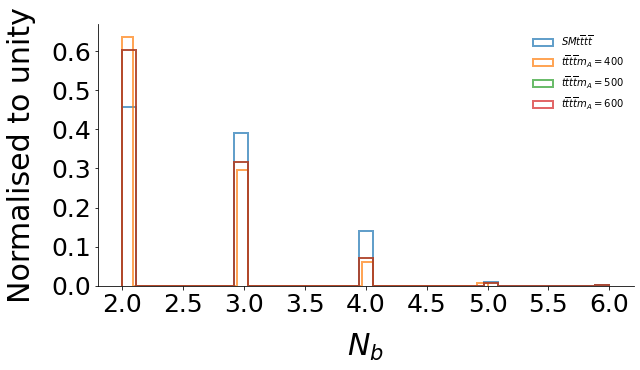

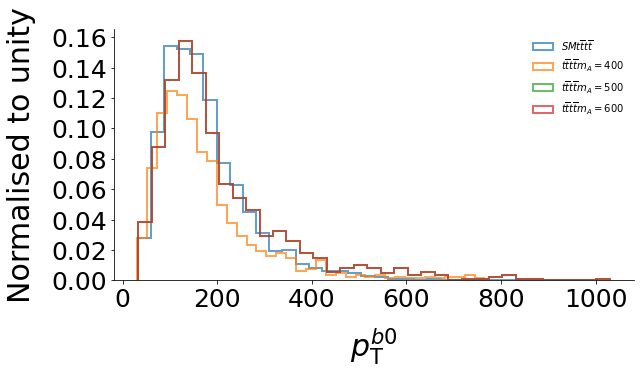

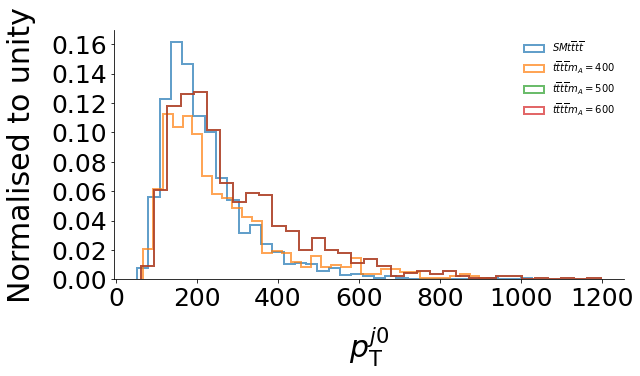

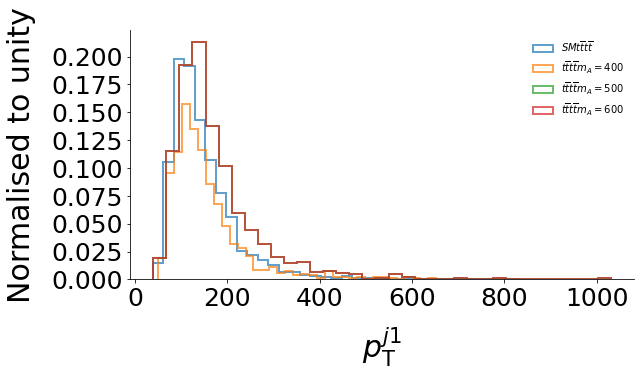

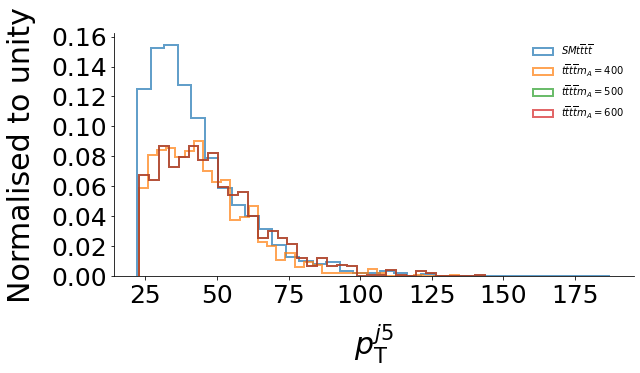

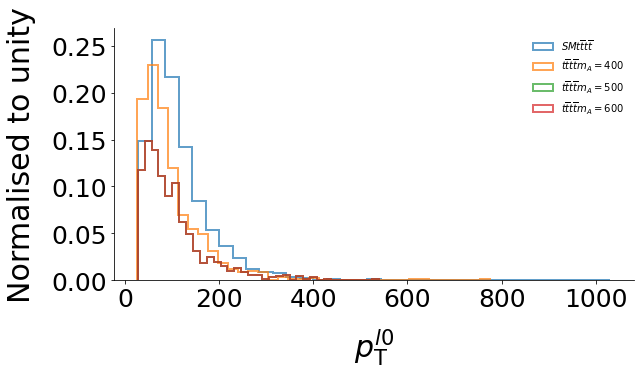

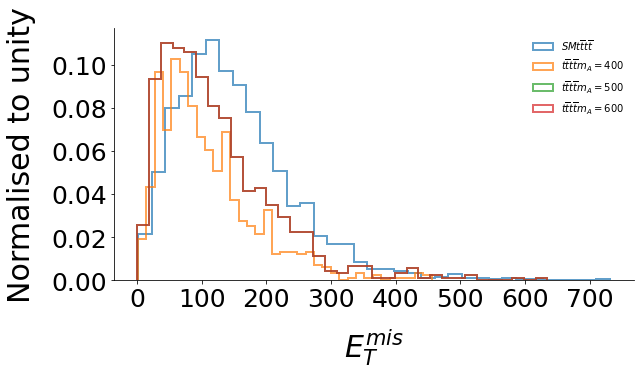

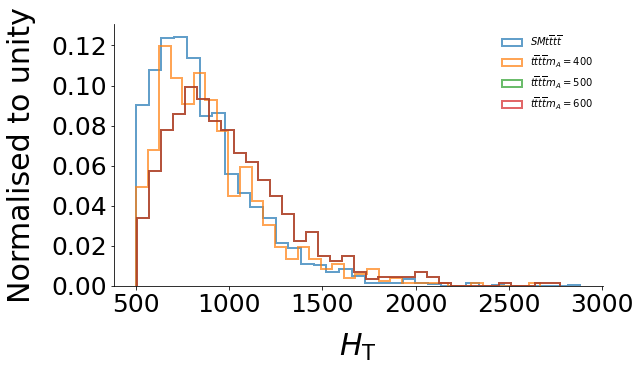

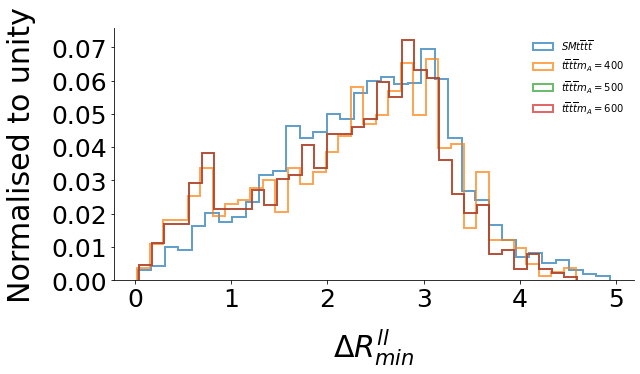

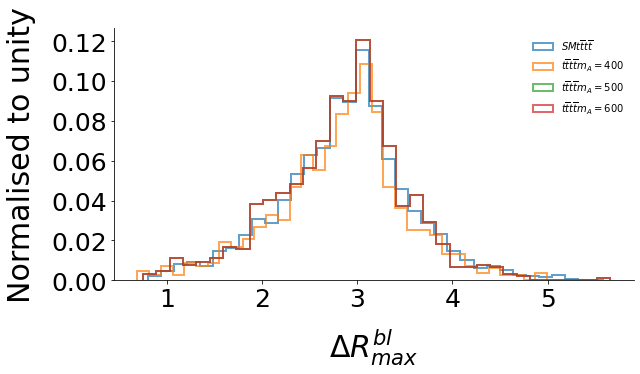

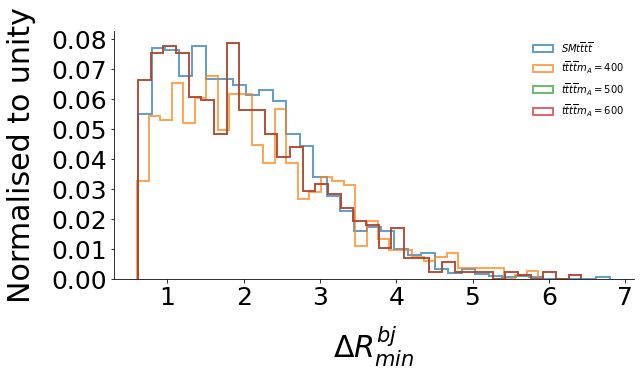

In [74]:
draw2SS('$N_{b}$')#
draw2SS('$p_{\mathrm{T}}^{b0}$'),
draw2SS('$p_{\mathrm{T}}^{j0}$'),
draw2SS('$p_{\mathrm{T}}^{j1}$'),
draw2SS('$p_{\mathrm{T}}^{j5}$'),
draw2SS('$p_{\mathrm{T}}^{l0}$')
draw2SS('$E_{T}^{mis}$')
draw2SS('$H_{\mathrm{T}}$')
draw2SS('$\Delta R_{min}^{ll}$')#,
draw2SS('$\Delta R_{max}^{bl}$')
draw2SS('$\Delta R_{min}^{bj}$')

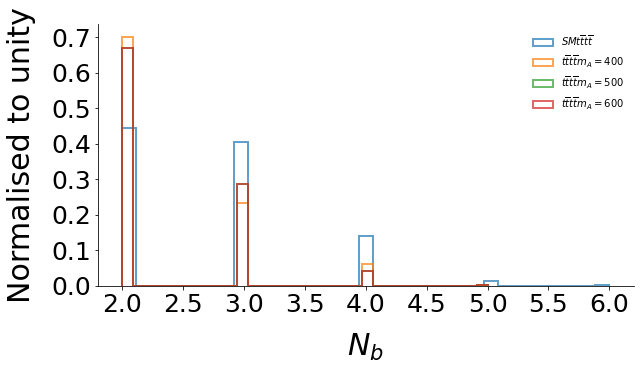

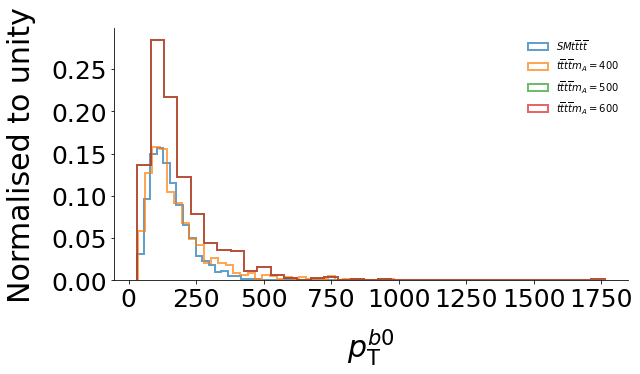

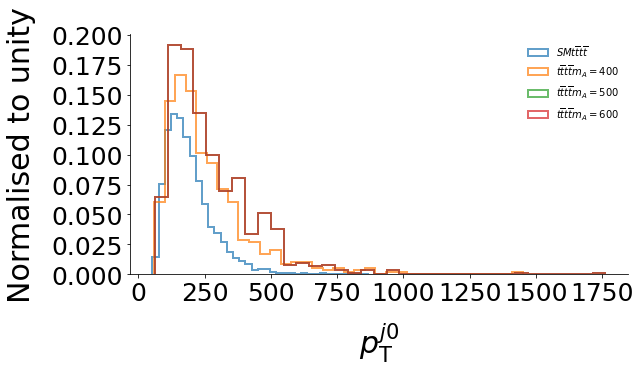

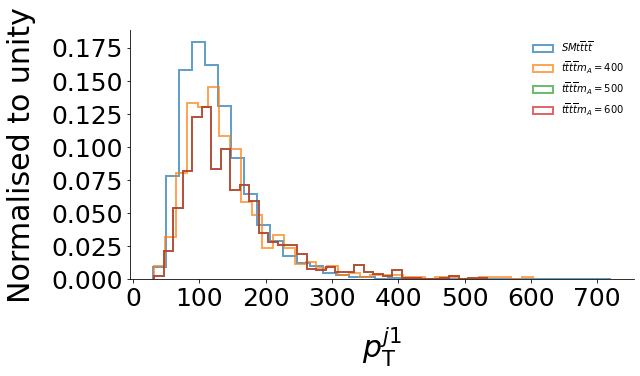

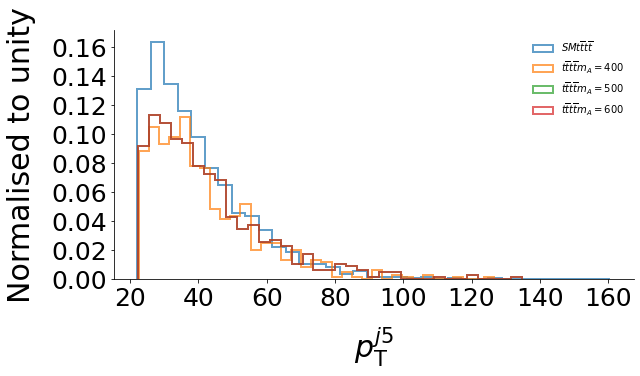

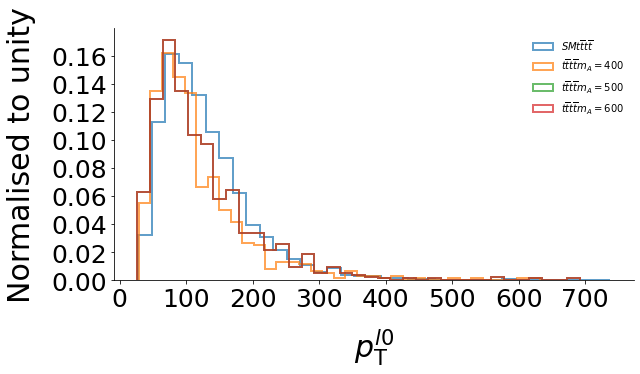

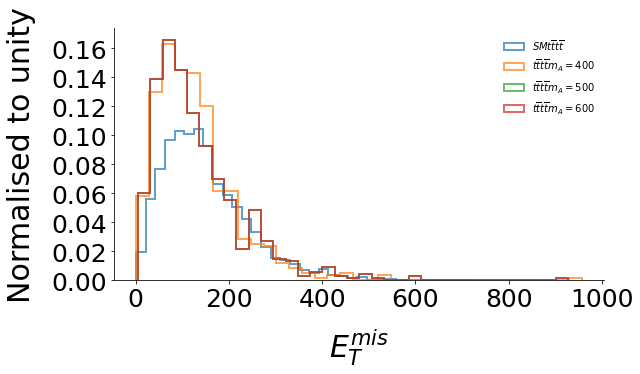

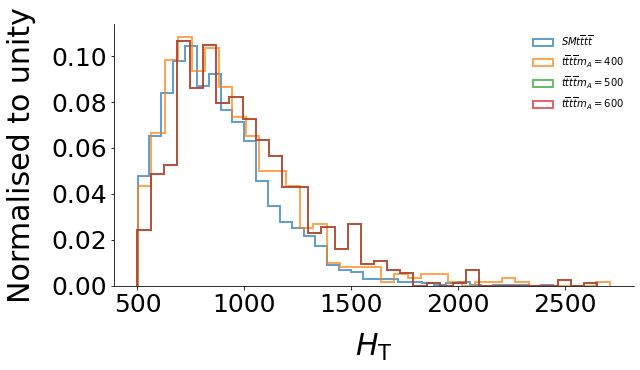

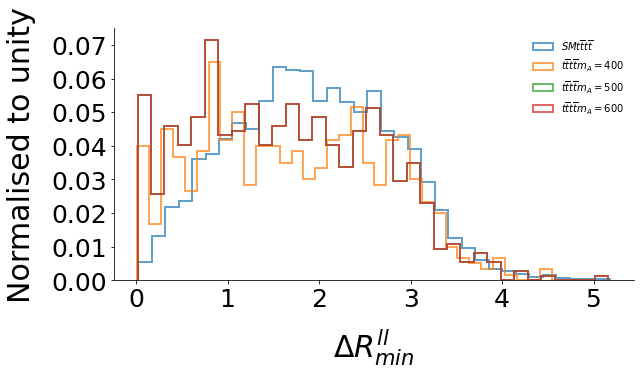

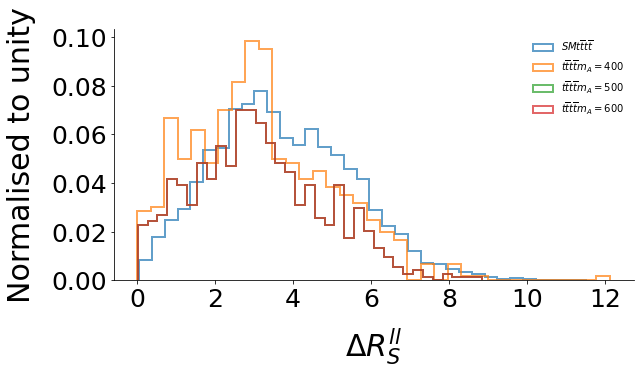

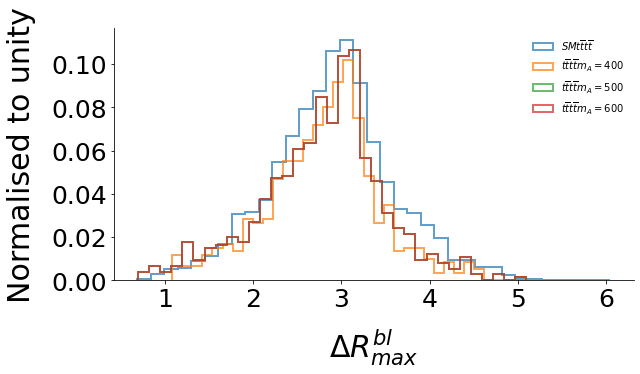

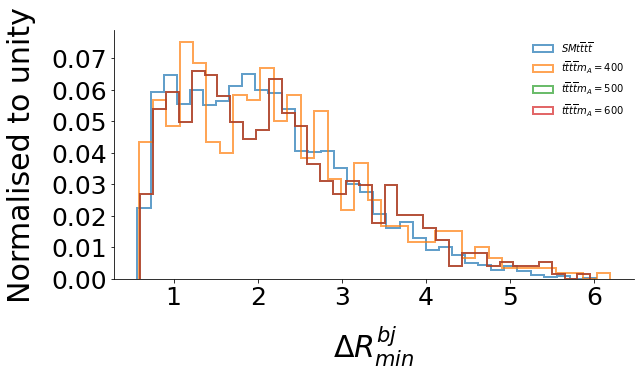

In [75]:
draw3L('$N_{b}$')#,
draw3L('$p_{\mathrm{T}}^{b0}$'),
draw3L('$p_{\mathrm{T}}^{j0}$'),
draw3L('$p_{\mathrm{T}}^{j1}$'),
draw3L('$p_{\mathrm{T}}^{j5}$'),
draw3L('$p_{\mathrm{T}}^{l0}$'),
draw3L('$E_{T}^{mis}$'),
draw3L('$H_{\mathrm{T}}$')
draw3L('$\Delta R_{min}^{ll}$')
draw3L('$\Delta R_{S}^{ll}$')
draw3L('$\Delta R_{max}^{bl}$') #,
draw3L('$\Delta R_{min}^{bj}$')

In [86]:
data_1_3L ['label'] = 0
data_1_2L ['label'] = 0



In [87]:
data_2_3L ['label'] = 1
data_2_2L ['label'] = 1



In [88]:
data_3_3L ['label'] = 1
data_2_2L ['label'] = 1

In [89]:
data_4_3L ['label'] = 1
data_4_2L ['label'] = 1

In [90]:
dataDA2= shuffle(pd.concat([data_1_2L,data_2_2L,data_3_2L,data_4_2L]))

In [91]:
dataDA3= shuffle(pd.concat([data_1_3L,data_2_3L,data_3_3L,data_4_3L]))

In [127]:
dataDA2 = dataDA2[['$N_{b}$', '$p_{\mathrm{T}}^{b0}$', '$p_{\mathrm{T}}^{j0}$',
       '$p_{\mathrm{T}}^{j1}$', '$p_{\mathrm{T}}^{j5}$',
       '$p_{\mathrm{T}}^{l0}$', '$E_{T}^{mis}$', '$H_{\mathrm{T}}$',
       '$\Delta R_{min}^{bj}$', '$\Delta R_{min}^{ll}$',
       '$\Delta R_{max}^{bl}$', 'label']]



In [128]:
dataDA2.isnull() 

,$N_{b}$,$p_{\mathrm{T}}^{b0}$,$p_{\mathrm{T}}^{j0}$,$p_{\mathrm{T}}^{j1}$,$p_{\mathrm{T}}^{j5}$,$p_{\mathrm{T}}^{l0}$,$E_{T}^{mis}$,$H_{\mathrm{T}}$,$\Delta R_{min}^{bj}$,$\Delta R_{min}^{ll}$,$\Delta R_{max}^{bl}$,label
2958,False,False,False,False,False,False,False,False,False,False,False,False
111,False,False,False,False,False,False,False,False,False,False,False,False
338,False,False,False,False,False,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False,False,False,False,False,False
1322,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1310,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False
1222,False,False,False,False,False,False,False,False,False,False,False,False
2665,False,False,False,False,False,False,False,False,False,False,False,False


In [132]:
dataDA2.isnull().sum()

$N_{b}$                  0
$p_{\mathrm{T}}^{b0}$    0
$p_{\mathrm{T}}^{j0}$    0
$p_{\mathrm{T}}^{j1}$    0
$p_{\mathrm{T}}^{j5}$    0
$p_{\mathrm{T}}^{l0}$    0
$E_{T}^{mis}$            0
$H_{\mathrm{T}}$         0
$\Delta R_{min}^{bj}$    0
$\Delta R_{min}^{ll}$    0
$\Delta R_{max}^{bl}$    0
label                    0
dtype: int64

In [133]:
dataDA2 = dataDA2.dropna(axis=0)

In [134]:
dataDA2

,$N_{b}$,$p_{\mathrm{T}}^{b0}$,$p_{\mathrm{T}}^{j0}$,$p_{\mathrm{T}}^{j1}$,$p_{\mathrm{T}}^{j5}$,$p_{\mathrm{T}}^{l0}$,$E_{T}^{mis}$,$H_{\mathrm{T}}$,$\Delta R_{min}^{bj}$,$\Delta R_{min}^{ll}$,$\Delta R_{max}^{bl}$,label
2958,2.0,280.490082,354.574005,285.431244,35.154591,283.028595,116.774864,1443.070065,1.917402,3.259626,3.918086,0.0
111,2.0,147.338760,147.338760,122.539131,28.640150,49.595596,190.308945,528.095507,2.345746,3.070563,2.994790,1.0
338,2.0,191.796265,384.230530,257.999817,62.435295,141.059113,112.171127,1378.911459,3.952021,4.365592,3.594100,1.0
195,3.0,119.131714,119.131714,94.435326,29.414444,90.972725,6.713029,567.494461,1.059912,2.454546,1.942969,0.0
1322,3.0,189.301636,189.301636,106.437271,26.763363,40.248013,123.509293,589.338926,0.731722,0.910983,2.509624,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1310,3.0,191.767120,191.767120,188.470413,35.664845,169.483627,83.247810,1014.795382,2.623664,2.548191,1.268647,0.0
175,3.0,78.096504,132.082733,78.096504,27.489653,89.947815,138.371307,566.862886,1.627717,1.704639,2.938722,1.0
1222,2.0,165.900528,165.900528,151.670319,49.886246,174.366043,235.173889,888.390388,1.158395,3.207469,2.590488,0.0
2665,2.0,41.021870,145.070038,143.869232,32.236080,171.435257,126.688560,694.013208,2.345518,2.512268,3.610339,0.0


In [135]:
dataDA2[dataDA2['label']==0].shape, dataDA2[dataDA2['label']==1].shape



((2566, 12), (1716, 12))

In [136]:
dataDA3[dataDA3['label']==0].shape, dataDA3[dataDA3['label']==1].shape

((4165, 13), (2086, 13))

In [137]:
dataset1 = dataDA2.values
X2 = dataset1[:,0:10].astype(float)
Y2 = dataset1[:,11]

In [138]:
dataset2 = dataDA3.values
X3 = dataset2[:,0:11].astype(float)
Y3 = dataset2[:,12]

In [139]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=1)

In [140]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.3, random_state=1)

In [141]:
initializer = tf.keras.initializers.RandomNormal()
initializer1 = tf.keras.initializers.HeUniform()
initializer2 = tf.keras.initializers.GlorotNormal()
initializer3 = tf.keras.initializers.GlorotUniform()
initializer4 = tf.keras.initializers.HeNormal()
initializer5 = tf.keras.initializers.RandomUniform()



In [142]:
model3 = Sequential()
model3.add(Dense(15, activation='relu', input_dim=11,kernel_initializer=initializer4))
model3.add(Dense(15, kernel_initializer=initializer4,activation='relu'))
model3.add(Dense(15, kernel_initializer=initializer4,activation='relu'))
model3.add(Dense(15, kernel_initializer=initializer4,activation='relu'))
model3.add(Dense(15, kernel_initializer=initializer4,activation='relu'))
model3.add(Dense(1, kernel_initializer=initializer4,activation='sigmoid'))
model3.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate= 0.0002),metrics=['accuracy'])

history3 = model3.fit(X3_train,Y3_train,epochs=30,batch_size=32,verbose=1,validation_split=0.3,shuffle=True)

C:\Users\kamom\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/30
96/96 [==============================] - 3s 12ms/step - loss: 18.6178 - accuracy: 0.4582 - val_loss: 2.9122 - val_accuracy: 0.5704
Epoch 2/30
96/96 [==============================] - 1s 6ms/step - loss: 2.4288 - accuracy: 0.6088 - val_loss: 2.0588 - val_accuracy: 0.6154
Epoch 3/30
96/96 [==============================] - 1s 6ms/step - loss: 1.7184 - accuracy: 0.6172 - val_loss: 1.5019 - val_accuracy: 0.6093
Epoch 4/30
96/96 [==============================] - 1s 6ms/step - loss: 1.1997 - accuracy: 0.6280 - val_loss: 0.9314 - val_accuracy: 0.6527
Epoch 5/30
96/96 [==============================] - 1s 6ms/step - loss: 0.8369 - accuracy: 0.6574 - val_loss: 0.8174 - val_accuracy: 0.6436
Epoch 6/30
96/96 [==============================] - 1s 6ms/step - loss: 0.7592 - accuracy: 0.6764 - val_loss: 0.7711 - val_accuracy: 0.6969
Epoch 7/30
96/96 [==============================] - 1s 6ms/step - loss: 0.7070 - accuracy: 0.6773 - val_loss: 0.7016 - val_accuracy: 0.6771
Epoch 8/30
96/96 [

In [143]:
model4 = Sequential()
model4.add(Dense(15, activation='relu', input_dim=10,kernel_initializer=initializer4))
model4.add(Dense(15, kernel_initializer=initializer4,activation='relu'))
model4.add(Dense(15, kernel_initializer=initializer4,activation='relu'))
model4.add(Dense(15, kernel_initializer=initializer4,activation='relu'))
model4.add(Dense(15, kernel_initializer=initializer4,activation='relu'))
model4.add(Dense(1, kernel_initializer=initializer4,activation='sigmoid'))
model4.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate= 0.0002),metrics=['accuracy'])

history4 = model4.fit(X2_train,Y2_train,epochs=50,batch_size=32,verbose=1,validation_split=0.3,shuffle=True)

Epoch 1/50
66/66 [==============================] - 10s 14ms/step - loss: 25.0178 - accuracy: 0.4201 - val_loss: 4.1839 - val_accuracy: 0.5944
Epoch 2/50
66/66 [==============================] - 0s 6ms/step - loss: 3.0663 - accuracy: 0.6013 - val_loss: 2.6585 - val_accuracy: 0.5933
Epoch 3/50
66/66 [==============================] - 0s 6ms/step - loss: 2.4243 - accuracy: 0.6013 - val_loss: 2.1557 - val_accuracy: 0.5856
Epoch 4/50
66/66 [==============================] - 0s 6ms/step - loss: 1.9535 - accuracy: 0.6118 - val_loss: 1.6675 - val_accuracy: 0.6011
Epoch 5/50
66/66 [==============================] - 0s 6ms/step - loss: 1.5175 - accuracy: 0.6061 - val_loss: 1.4701 - val_accuracy: 0.6356
Epoch 6/50
66/66 [==============================] - 0s 6ms/step - loss: 1.2825 - accuracy: 0.6223 - val_loss: 1.2908 - val_accuracy: 0.6322
Epoch 7/50
66/66 [==============================] - 0s 6ms/step - loss: 1.0545 - accuracy: 0.6414 - val_loss: 0.8801 - val_accuracy: 0.6089
Epoch 8/50
66/66 

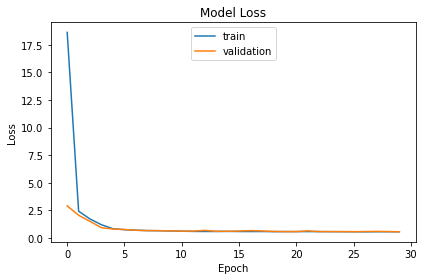

In [144]:
#print(history.history.keys())
# "Loss"
plt.plot(history3.history['loss'],"-")
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.legend(['train', 'validation'],loc='upper left')
plt.legend(['train', 'validation'], loc='upper center')
plt.tight_layout()
# plt.savefig('/home/thuso/Documents/work/PHYSICS/Physics/generated events graphs/90k/pp2ttr_r2tt/600/model results/3L/3L-model_L-600.pdf')
plt.show()

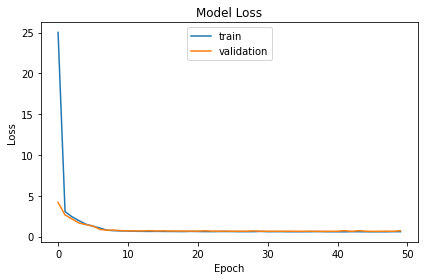

In [145]:
#print(history.history.keys())
# "Loss"
plt.plot(history4.history['loss'],"-")
plt.plot(history4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.legend(['train', 'validation'],loc='upper left')
plt.legend(['train', 'validation'], loc='upper center')
plt.tight_layout()
# plt.savefig('/home/thuso/Documents/work/PHYSICS/Physics/generated events graphs/90k/pp2ttr_r2tt/600/model results/3L/3L-model_L-600.pdf')
plt.show()

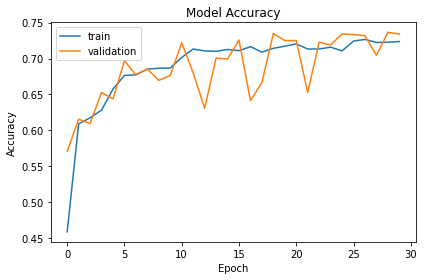

In [146]:
plt.grid(False)
plt.plot(history3.history['accuracy'],"-")
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([r'\bf{train}', r'\bf{validation}'],loc='best')
plt.legend(['train', 'validation'], loc='best')
plt.tight_layout()
# plt.savefig('/home/thuso/Documents/work/PHYSICS/Physics/generated events graphs/90k/pp2ttr_r2tt/600/model results/2L/2L-model_A-600.pdf')
plt.show()




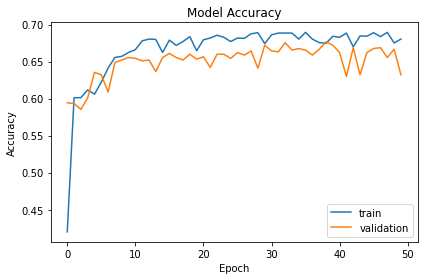

In [147]:
plt.grid(False)
plt.plot(history4.history['accuracy'],"-")
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([r'\bf{train}', r'\bf{validation}'],loc='best')
plt.legend(['train', 'validation'], loc='best')
plt.tight_layout()
# plt.savefig('/home/thuso/Documents/work/PHYSICS/Physics/generated events graphs/90k/pp2ttr_r2tt/600/model results/2L/2L-model_A-600.pdf')
plt.show()

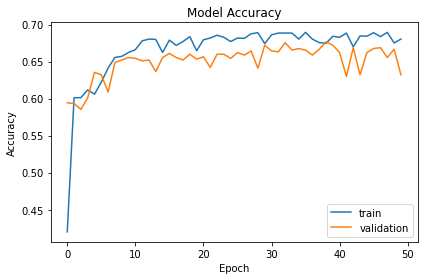

In [148]:
plt.grid(False)
plt.plot(history4.history['accuracy'],"-")
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([r'\bf{train}', r'\bf{validation}'],loc='best')
plt.legend(['train', 'validation'], loc='best')
plt.tight_layout()
# plt.savefig('/home/thuso/Documents/work/PHYSICS/Physics/generated events graphs/90k/pp2ttr_r2tt/600/model results/2L/2L-model_A-600.pdf')
plt.show()

In [149]:
pred_train32= model3.predict(X3_train)
pred_train32= list(chain.from_iterable(pred_train32)) 

scores32= model3.evaluate(X3_train, Y3_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores32[1], 1 - scores32[1]))   
 
pred_test32= model3.predict(X3_test)
pred_test32= list(chain.from_iterable(pred_test32)) 

scores3S2 = model3.evaluate(X3_test, Y3_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores3S2[1], 1 - scores3S2[1]))    

137/137 [==============================] - 1s 3ms/step
Accuracy on training data: 0.7330285906791687% 
 Error on training data: 0.2669714093208313
59/59 [==============================] - 0s 3ms/step
Accuracy on test data: 0.7158848643302917% 
 Error on test data: 0.28411513566970825


In [150]:
pred_train22= model4.predict(X2_train)
pred_train22= list(chain.from_iterable(pred_train22)) 

scores22= model4.evaluate(X2_train, Y2_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores22[1], 1 - scores22[1]))   
 
pred_test22= model4.predict(X2_test)
pred_test22= list(chain.from_iterable(pred_test22)) 

scores2S2 = model4.evaluate(X2_test, Y2_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2S2[1], 1 - scores2S2[1])) 

94/94 [==============================] - 0s 3ms/step
Accuracy on training data: 0.6643310189247131% 
 Error on training data: 0.33566898107528687
41/41 [==============================] - 0s 3ms/step
Accuracy on test data: 0.6544747352600098% 
 Error on test data: 0.34552526473999023


In [151]:
def function1(label, probs):
    sig = []
    backG = []
    for i in range(len(probs)):
        if(label[i] == 1):
            sig.append(probs[i])
            
        elif(label[i] == 0):
            backG.append(probs[i])
            
    return sig,backG

In [152]:
qp202,qp212 = function1(Y2_train, pred_train22)

In [153]:
qp302,qp312 = function1(Y3_train, pred_train32)




In [154]:
qp20t2,qp21t2 = function1(Y2_test, pred_test22)

In [155]:
qp30t2,qp31t2 = function1(Y3_test, pred_test32)



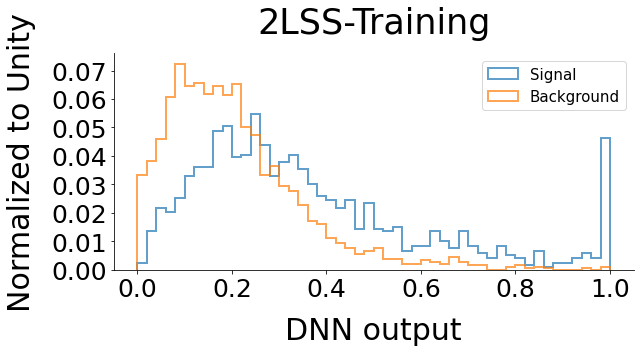

In [156]:
from matplotlib.lines import Line2D

rng = np.random.default_rng(seed=123)

wei20 = np.ones_like(qp202) / float(len(qp202))
wei21 = np.ones_like(qp212) / float(len(qp212))

# Create two normally distributed random variables of different sizes
# and with different shapes

# Create figure with 'step' type of histogram to improve plot readability
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(qp202, weights=wei20, bins=50, range=(0, 1), histtype='step', linewidth=2, alpha=0.7, label='Signal')
ax.hist(qp212, weights=wei21, bins=50, range=(0, 1), histtype='step', linewidth=2, alpha=0.7, label='Background')

# Edit legend to get lines as legend keys instead of the default polygons
# and sort the legend entries in alphanumeric order
handles, labels = ax.get_legend_handles_labels()
leg_entries = {}
for h, label in zip(handles, labels):
    leg_entries[label] = Line2D([0], [0], color=h.get_facecolor()[:-1],
                                alpha=h.get_alpha(), lw=h.get_linewidth())
labels_sorted, lines = zip(*sorted(leg_entries.items()))
ax.legend(lines, labels_sorted, frameon=False)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add annotations
plt.ylabel('Normalized to Unity', fontsize=30, labelpad=15)
plt.xlabel('DNN output', fontsize=30, labelpad=15)
plt.title('2LSS-Training', fontsize=35, pad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=15)
plt.tight_layout()
# plt.savefig('/home/thuso/Documents/work/PHYSICS/Physics/generated events graphs/90k/pp2ttr_r2tt/600/model results/2L/2LSS-Train_normalised_600.pdf')
# plt.savefig('2SSL-train-mas500.pdf')
plt.show()

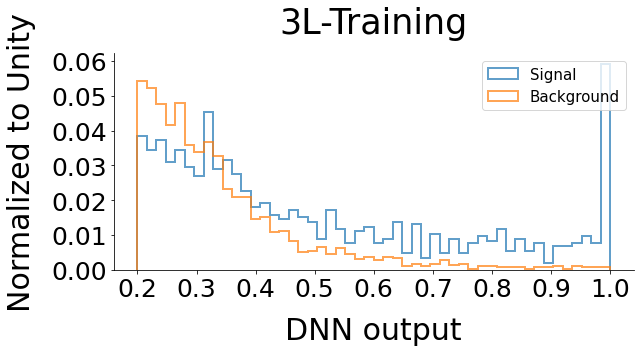

In [157]:
from matplotlib.lines import Line2D

rng = np.random.default_rng(seed=123)

wei30 = np.ones_like(qp302) / float(len(qp302))
wei31 = np.ones_like(qp312) / float(len(qp312))

# Create two normally distributed random variables of different sizes
# and with different shapes

# Create figure with 'step' type of histogram to improve plot readability
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(qp302, weights=wei30, range=(0.2, 1), bins=50, histtype='step', linewidth=2, alpha=0.7, label='Signal')
ax.hist(qp312, weights=wei31, range=(0.2, 1), bins=50, histtype='step', linewidth=2, alpha=0.7, label='Background')

# Edit legend to get lines as legend keys instead of the default polygons
# and sort the legend entries in alphanumeric order
handles, labels = ax.get_legend_handles_labels()
leg_entries = {}
for h, label in zip(handles, labels):
    leg_entries[label] = Line2D([0], [0], color=h.get_facecolor()[:-1],
                                alpha=h.get_alpha(), lw=h.get_linewidth())
labels_sorted, lines = zip(*sorted(leg_entries.items()))
ax.legend(lines, labels_sorted, frameon=False)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add annotations
plt.ylabel('Normalized to Unity', fontsize=30, labelpad=15)
plt.xlabel('DNN output', fontsize=30, labelpad=15)
plt.title('3L-Training', fontsize=35, pad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=15)
plt.tight_layout()
# plt.savefig('/home/thuso/Documents/work/PHYSICS/Physics/generated events graphs/90k/pp2ttr_r2tt/600/model results/3L/3L-Train_normalised_600.pdf')
# plt.savefig('3L-train-mas500.pdf')
plt.show()

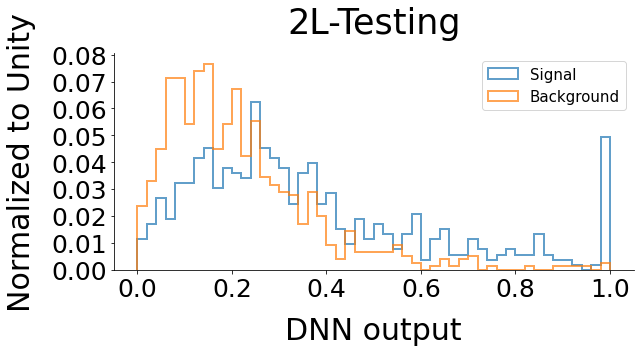

In [158]:
from matplotlib.lines import Line2D

rng = np.random.default_rng(seed=123)

wei20t = np.ones_like(qp20t2) / float(len(qp20t2))
wei21t = np.ones_like(qp21t2) / float(len(qp21t2))

# Create two normally distributed random variables of different sizes
# and with different shapes

# Create figure with 'step' type of histogram to improve plot readability
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(qp20t2, weights=wei20t, range=(0,1), bins=50, histtype='step', linewidth=2, alpha=0.7, label='Signal')
ax.hist(qp21t2, weights=wei21t, range=(0,1), bins=50, histtype='step', linewidth=2, alpha=0.7, label='Background')

# Edit legend to get lines as legend keys instead of the default polygons
# and sort the legend entries in alphanumeric order
handles, labels = ax.get_legend_handles_labels()
leg_entries = {}
for h, label in zip(handles, labels):
    leg_entries[label] = Line2D([0], [0], color=h.get_facecolor()[:-1],
                                alpha=h.get_alpha(), lw=h.get_linewidth())
labels_sorted, lines = zip(*sorted(leg_entries.items()))
ax.legend(lines, labels_sorted, frameon=False)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add annotations
plt.ylabel('Normalized to Unity', fontsize=30, labelpad=15)
plt.xlabel('DNN output', fontsize=30, labelpad=15)
plt.title('2L-Testing', fontsize=35, pad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=15)
plt.tight_layout()
# plt.savefig('/home/thuso/Documents/work/PHYSICS/Physics/generated events graphs/90k/pp2ttr_r2tt/600/model results/2L/Testing_normalised_600.pdf')
# plt.savefig('2SSL-test-mas500.pdf')
plt.show()




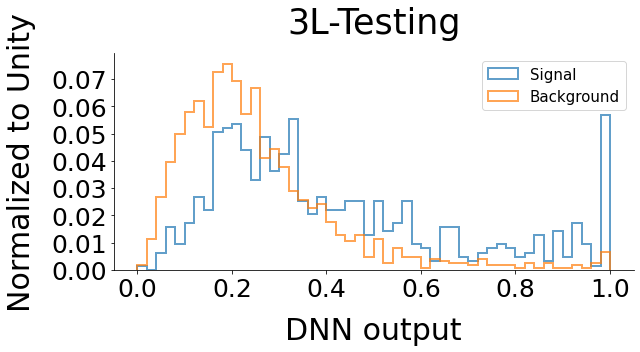

In [159]:
from matplotlib.lines import Line2D

rng = np.random.default_rng(seed=123)

wei30t = np.ones_like(qp30t2) / float(len(qp30t2))
wei31t = np.ones_like(qp31t2) / float(len(qp31t2))

# Create two normally distributed random variables of different sizes
# and with different shapes

# Create figure with 'step' type of histogram to improve plot readability
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(qp30t2, weights=wei30t, bins=50, range=(0,1), histtype='step', linewidth=2, alpha=0.7, label='Signal')
ax.hist(qp31t2, weights=wei31t, bins=50, range=(0,1), histtype='step', linewidth=2, alpha=0.7, label='Background')

# Edit legend to get lines as legend keys instead of the default polygons
# and sort the legend entries in alphanumeric order
handles, labels = ax.get_legend_handles_labels()
leg_entries = {}
for h, label in zip(handles, labels):
    leg_entries[label] = Line2D([0], [0], color=h.get_facecolor()[:-1],
                                alpha=h.get_alpha(), lw=h.get_linewidth())
labels_sorted, lines = zip(*sorted(leg_entries.items()))
ax.legend(lines, labels_sorted, frameon=False)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add annotations
plt.ylabel('Normalized to Unity', fontsize=30, labelpad=15)
plt.xlabel('DNN output', fontsize=30, labelpad=15)
plt.title('3L-Testing', fontsize=35, pad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=15)
plt.tight_layout()
# plt.savefig('/home/thuso/Documents/work/PHYSICS/Physics/generated events graphs/90k/pp2ttr_r2tt/600/model results/3L/3L-Testing_normalised_600.pdf')
plt.savefig('3L-test-mas500.pdf')
plt.show()



In [160]:
fpr_Test22, tpr_Test22, threshold22 = roc_curve(Y2_test, pred_test22)
fpr_Train22, tpr_Train22, threshold22 = roc_curve(Y2_train, pred_train22)



In [161]:
fpr_Test32, tpr_Test32, threshold32= roc_curve(Y3_test, pred_test32)
fpr_Train32, tpr_Train32, threshold32= roc_curve(Y3_train, pred_train32)

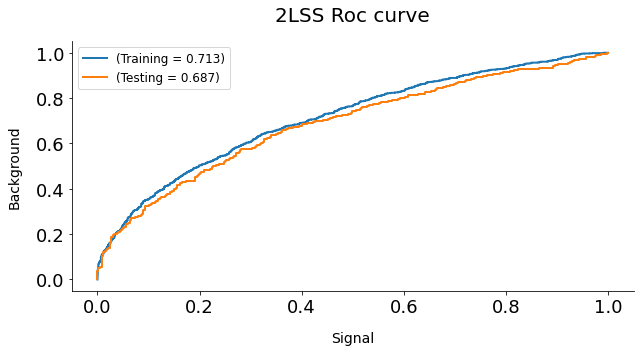

In [162]:
from matplotlib.lines import Line2D

auc_keras_Test22 = auc(fpr_Test22, tpr_Test22)
auc_keras_Train22 = auc(fpr_Train22, tpr_Train22)

#data1 = qp0t
#data2 = qp1t
#data3 = yhat

# Create figure with 'step' type of histogram to improve plot readability
fig, ax = plt.subplots(figsize=(9,5))


ax.plot(fpr_Train22, tpr_Train22,linewidth=2, label='(Training = {:.3f})'.format(auc(fpr_Train22, tpr_Train22)))
ax.plot(fpr_Test22, tpr_Test22,linewidth=2, label='(Testing = {:.3f})'.format(auc(fpr_Test22, tpr_Test22)))


# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add annotations
plt.ylabel('Background', fontsize=14, labelpad=15)
plt.xlabel('Signal', fontsize=14, labelpad=15)
plt.title('2LSS Roc curve', fontsize=20, pad=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=12)
plt.tight_layout()
# plt.savefig('/home/thuso/Documents/work/PHYSICS/Physics/generated events graphs/90k/pp2ttr_r2tt/600/model results/2L-roc-test&train.pdf')
# plt.savefig('2SS-roc-mass500.pdf')
plt.show()

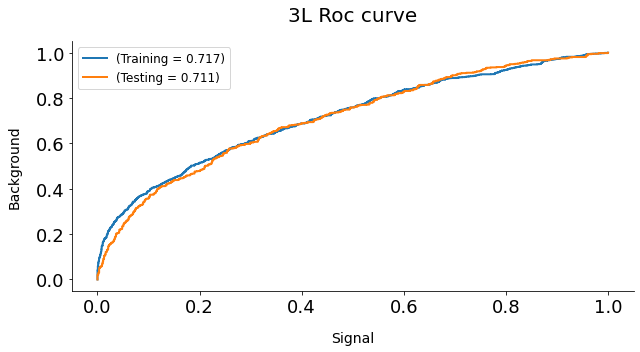

In [164]:
from matplotlib.lines import Line2D

auc_keras_Test32 = auc(fpr_Test32, tpr_Test32)
auc_keras_Train32 = auc(fpr_Train32, tpr_Train32)

#data1 = qp0t
#data2 = qp1t
#data3 = yhat

# Create figure with 'step' type of histogram to improve plot readability
fig, ax = plt.subplots(figsize=(9,5))

ax.plot(fpr_Train32, tpr_Train32,linewidth=2, label='(Training = {:.3f})'.format(auc(fpr_Train32, tpr_Train32)))
ax.plot(fpr_Test32, tpr_Test32,linewidth=2, label='(Testing = {:.3f})'.format(auc(fpr_Test32, tpr_Test32)))


# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add annotations
plt.ylabel('Background', fontsize=14, labelpad=15)
plt.xlabel('Signal', fontsize=14, labelpad=15)
plt.title('3L Roc curve', fontsize=20, pad=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=12)
plt.tight_layout()
# plt.savefig('/home/thuso/Documents/work/PHYSICS/Physics/generated events graphs/90k/pp2ttr_r2tt/600/model results/3L-roc-test&train.pdf')
plt.savefig('3L-roc-mass500.pdf')
plt.show()